In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import pickle
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'
ROOT = os.path.dirname(os.getcwd())

In [2]:
#metrics
player_network_base = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'player_passing_networks_exploration.pkl.gz'))
zone_network_base = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'zonal_passing_networks_exploration.pkl.gz'))
lane_intensity = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'zone_lane_info_clustered.pkl.gz')) #includes cluster assignment for k=2
lane_cluster_centers = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'zone_lane_info_cluster_centers.pkl.gz')).sort_index()
advance_ratio = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'advance_ratio.pkl.gz'))
player_network_advanced = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'player_network_algorithms.pkl.gz'))
defensive_metrics_normalized = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'defensive_metrics_normalized_by_possession.pkl.gz'))
atts_defense = ['possession',
        'yellow_card/possession',
        'total_fouls/possession',
        'dangerous_ball_lost/possession',
        'interception_total/possession',
        'interception_inside_box/possession',
        'sliding_tackle_total/possession',
        'sliding_tackle_inside_box/possession',
        'fraction_slide_tackles_in_box',
        'fraction_interception_in_box',
        'centroid_slidetackles_interceptions_y',
        'centroid_slidetackles_interceptions_x',
        'fouls_committed',
        'yellow_card_per_foul_committed']
defensive_metrics_normalized  = defensive_metrics_normalized [atts_defense]

#performance
match_goals_wins = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'matches_goals_wins.pkl.gz'))
performance = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'team_performance.pkl.gz'))

In [3]:
df = pd.concat([player_network_base,
                zone_network_base,
                lane_intensity[['cluster']].droplevel(1, axis=1).rename({'cluster': 'passing_lane_cluster'}, axis=1), #Only considering clusters for now
                advance_ratio,
                player_network_advanced,
                defensive_metrics_normalized], axis=1)

#df = df.drop(columns = ['w'])

#Taking Z-score cross sectionally to make visualization/interpretation easier
df = (df - df.mean())/df.std()
feats_pre_aggregation = df.copy()

df = df.mean(level=1)

display(df)
[c for c in df.columns]

,w,mean_passes_players,std_passes_players,mean_passes_zone,std_passes_zone,passing_lane_cluster,advance_ratio,avg_clustering_coefficient,algebraic_connectivity,avg_shortest_path_all_pairs,...,interception_total/possession,interception_inside_box/possession,sliding_tackle_total/possession,sliding_tackle_inside_box/possession,fraction_slide_tackles_in_box,fraction_interception_in_box,centroid_slidetackles_interceptions_y,centroid_slidetackles_interceptions_x,fouls_committed,yellow_card_per_foul_committed
1609,1.349828,1.383719,1.210821,1.318559,0.867277,0.724807,0.942581,0.823521,0.285888,-0.880856,...,-0.597264,-0.422298,-0.133271,-0.257925,-0.066614,-0.024418,0.172948,0.138608,-0.581559,-0.165173
1631,-0.397137,-0.397221,-0.301509,-0.378376,-0.317825,-0.120642,-0.192044,-0.149539,-0.290168,0.328468,...,0.302106,0.217524,-0.151535,0.088878,0.081405,-0.070312,0.241299,-0.140117,-0.751208,0.021291
1625,2.334912,2.365047,2.181653,1.979032,2.122256,0.777647,1.175104,1.124108,0.691276,-1.303436,...,-1.063364,-0.916467,-0.742564,-0.284857,-0.161170,-0.934855,-0.346821,0.999070,-0.817856,0.079033
1651,-0.487124,-0.419253,-0.485131,-0.467881,-0.515815,-0.649047,-0.168505,-0.119321,-0.177045,0.352794,...,0.512890,0.591098,0.444890,0.555335,0.160648,0.510576,-0.275684,-0.560393,-0.454322,-0.137114
1610,0.868509,0.868324,0.854223,1.049378,0.537053,0.249242,0.598036,0.376209,0.362013,-0.740960,...,-0.408897,-0.321480,-0.598932,-0.109132,0.163372,-0.185342,-0.074649,0.180856,-0.763326,-0.453184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,-0.127797,-0.176530,0.012015,-0.108863,-0.052318,-0.067801,0.193723,-0.027754,-0.174856,0.116355,...,-0.033450,0.254082,0.052223,0.119893,0.109072,0.737538,0.257581,-0.686276,0.012214,0.094905
3193,-0.213421,-0.244486,-0.207834,-0.173746,-0.314987,-0.067801,-0.114388,-0.451490,0.118772,0.046617,...,-0.046088,0.055746,-0.134127,-0.168932,-0.153556,0.289883,0.102781,-0.157528,0.399984,-0.079843
3315,-0.610156,-0.612468,-0.520994,-0.528771,-0.644817,-0.384845,-0.268647,-0.508007,-0.414971,0.583858,...,0.639122,0.527137,0.094643,0.044424,0.011577,0.188628,-0.195003,-0.128205,0.012214,0.291158
3163,-0.366379,-0.409122,-0.425246,-0.298520,-0.205507,-0.279164,-0.015855,-0.321380,0.186651,0.170748,...,0.424784,0.320519,-0.422358,-0.165915,0.018282,0.136027,-0.318745,-0.313487,0.315159,-0.097209


['w',
 'mean_passes_players',
 'std_passes_players',
 'mean_passes_zone',
 'std_passes_zone',
 'passing_lane_cluster',
 'advance_ratio',
 'avg_clustering_coefficient',
 'algebraic_connectivity',
 'avg_shortest_path_all_pairs',
 'possession',
 'yellow_card/possession',
 'total_fouls/possession',
 'dangerous_ball_lost/possession',
 'interception_total/possession',
 'interception_inside_box/possession',
 'sliding_tackle_total/possession',
 'sliding_tackle_inside_box/possession',
 'fraction_slide_tackles_in_box',
 'fraction_interception_in_box',
 'centroid_slidetackles_interceptions_y',
 'centroid_slidetackles_interceptions_x',
 'fouls_committed',
 'yellow_card_per_foul_committed']

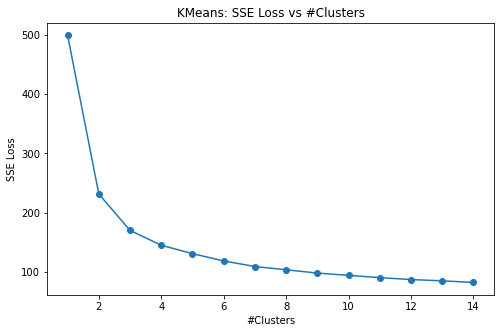

In [4]:
from sklearn.cluster import KMeans


plt.figure(figsize=(8, 5))
plt.plot([i for i in range(1,15)],
         [KMeans(n_clusters=i, random_state=0).fit(df.fillna(0)).inertia_ for i in range(1,15)], 'o-')

plt.title('KMeans: SSE Loss vs #Clusters')
plt.xlabel('#Clusters')
plt.ylabel('SSE Loss')
#plt.savefig('../figures/passing_lane_k_means/elbow_curve.png', bbox_inches='tight')
plt.show()


**Elbow = 2 Clusters**

In [5]:
kmeans_classifier = KMeans(n_clusters=2, random_state=0).fit(df.fillna(0))
df['CLUSTER_GLOBAL'] = kmeans_classifier.labels_

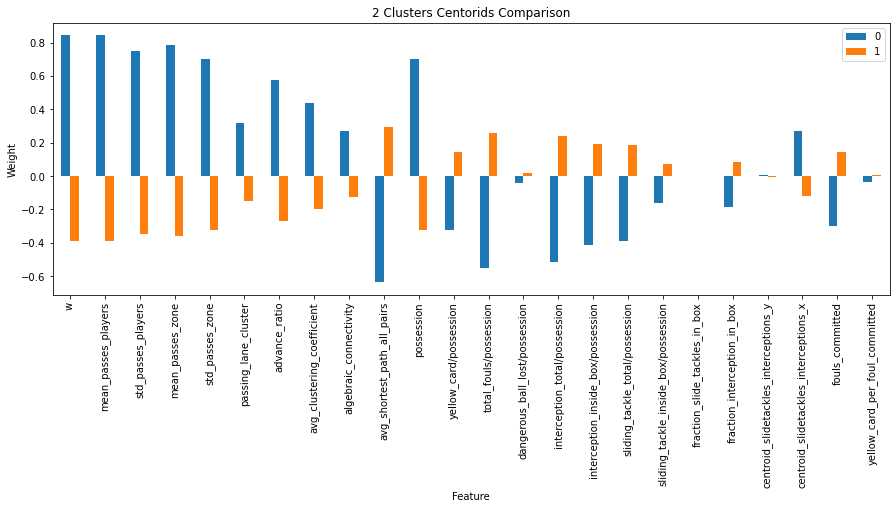

In [6]:
cluster_centers = pd.DataFrame(kmeans_classifier.cluster_centers_).iloc[:, :].T
cluster_centers.index = df.columns[:-1]
cluster_centers.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('2 Clusters Centorids Comparison')
plt.show()

### Remark
Here we see a very clear separation between offensive(blue), dominant and defensive(orange), reserved playing syles. It might be a good idea to:  

1) See performance discrepencies across these two tyles  
2) See how often the same team hold on to its playing style of we analyze performances instead of team  
3) Can we get reasonable interpretations with more clusters?  
4) Try MI to see which features are most important for indicating performance  
5) Try an attribution study and hierarchical clustering (need to study these first)

**Perfromance dicrepencies**

In [7]:
df_combined = pd.concat([df, performance], axis=1)

df_combined.loc[df_combined['CLUSTER_GLOBAL']==0, 'name']

675             Real Madrid
676               Barcelona
680                 Sevilla
684              Real Betis
687           Real Sociedad
692           Celta de Vigo
714              Las Palmas
1609                Arsenal
1610                Chelsea
1611      Manchester United
1612              Liverpool
1624      Tottenham Hotspur
1625        Manchester City
2444    Bayern M\u00fcnchen
2446       Bayer Leverkusen
2447      Borussia Dortmund
2454    Borussia M'gladbach
2975             RB Leipzig
3157                  Milan
3158                   Roma
3159               Juventus
3161         Internazionale
3162                  Lazio
3164              Sampdoria
3172               Atalanta
3187                 Napoli
3766     Olympique Lyonnais
3767                    PSG
3771    Olympique Marseille
3775                   Nice
3776                  Lille
Name: name, dtype: object

In [8]:
df_combined.loc[df_combined['CLUSTER_GLOBAL']==1, 'name'].head(50)

674                     Valencia
677     Deportivo La Coru\u00f1a
678                Athletic Club
679         Atl\u00e9tico Madrid
682                   Villarreal
683                  M\u00e1laga
691                     Espanyol
695                      Levante
696        Deportivo Alav\u00e9s
698                       Getafe
701                        Eibar
712                 Legan\u00e9s
756                       Girona
1613            Newcastle United
1619                 Southampton
1623                     Everton
1627        West Bromwich Albion
1628              Crystal Palace
1631              Leicester City
1633             West Ham United
1639                  Stoke City
1644                     Watford
1646                     Burnley
1651      Brighton & Hove Albion
1659             AFC Bournemouth
1673           Huddersfield Town
2443               Werder Bremen
2445                   Stuttgart
2449                  Schalke 04
2450                Hamburger SV
2451      

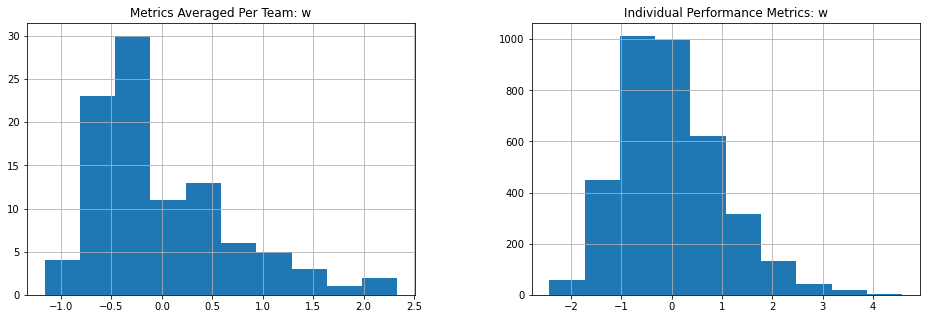

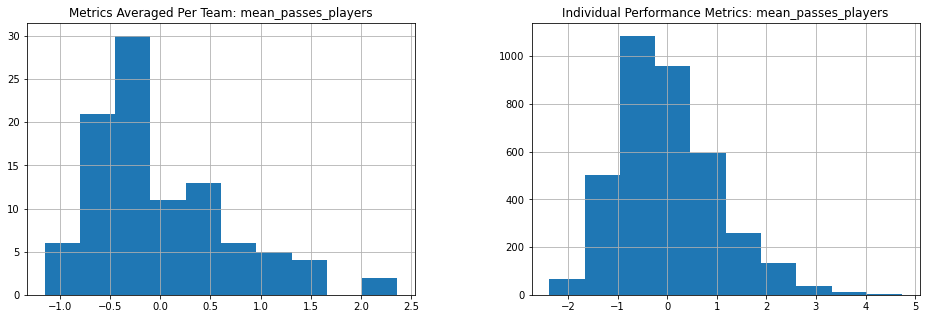

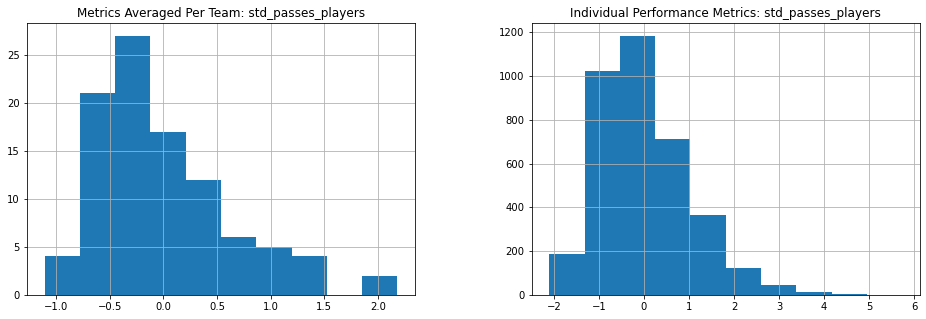

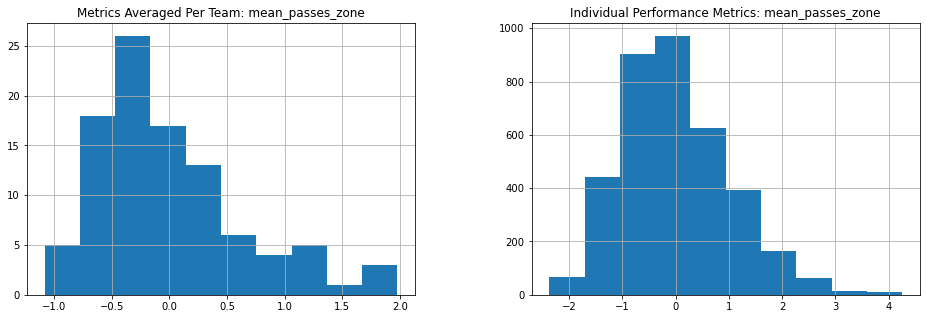

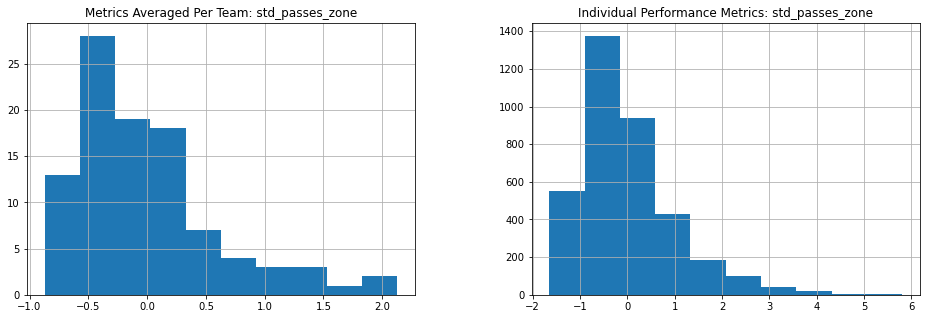

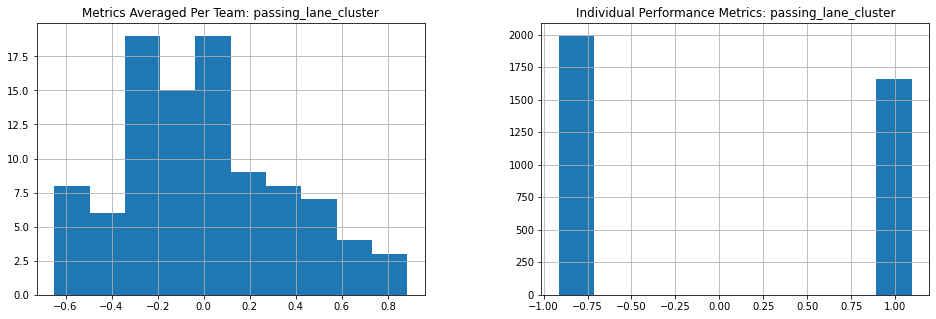

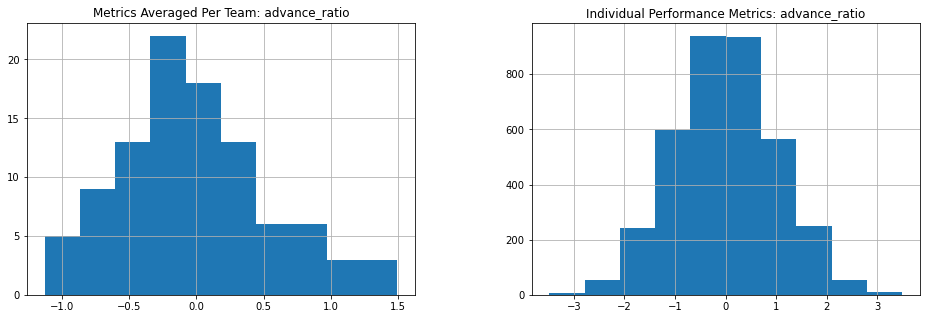

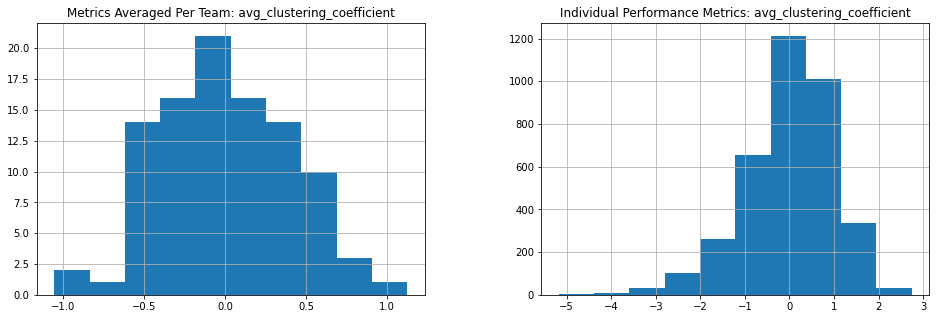

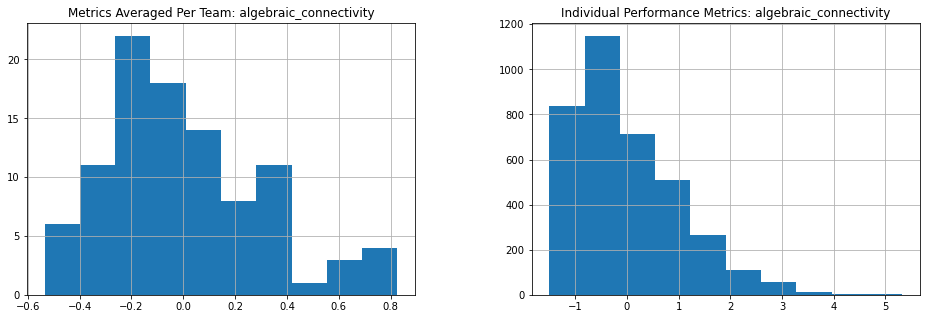

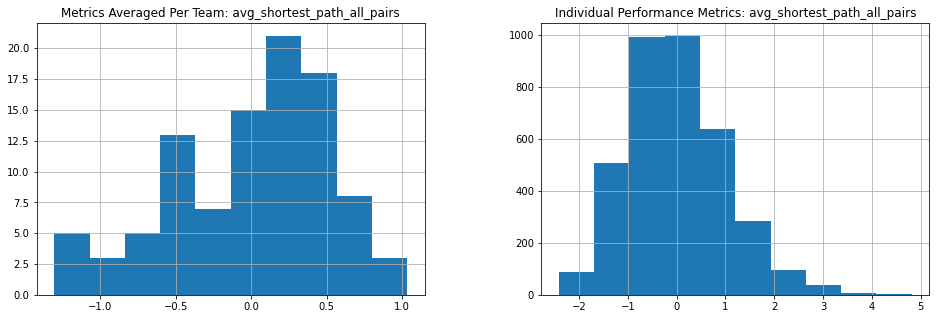

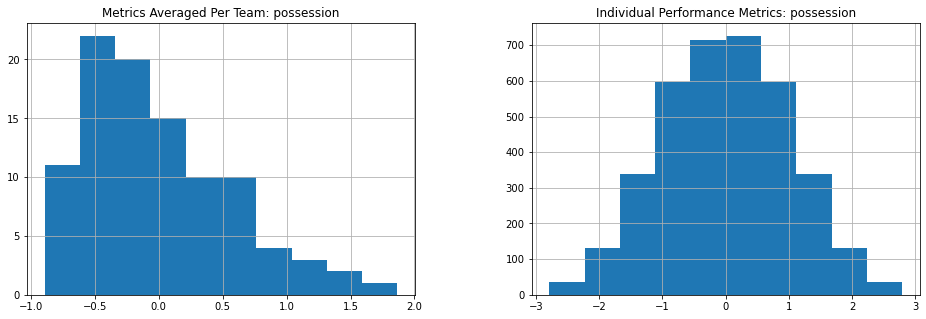

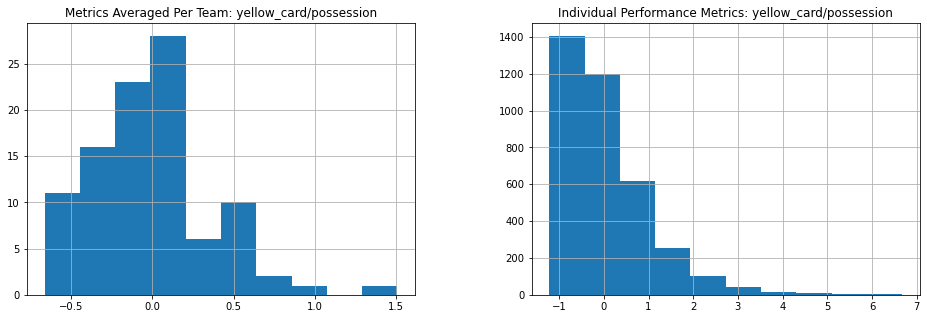

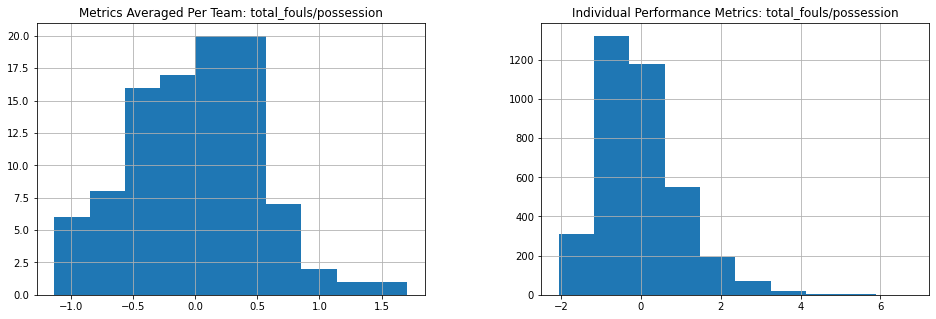

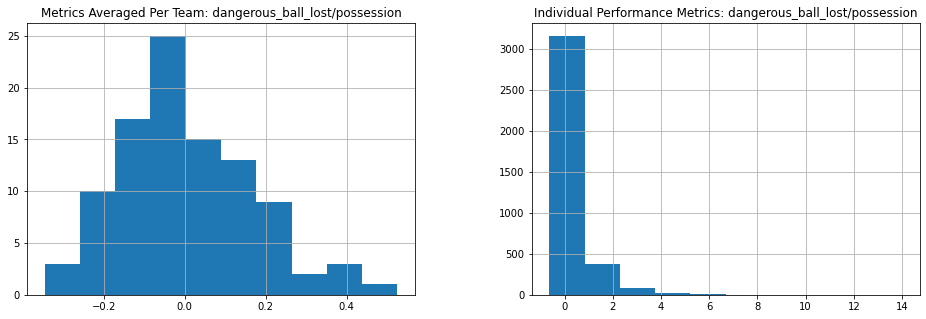

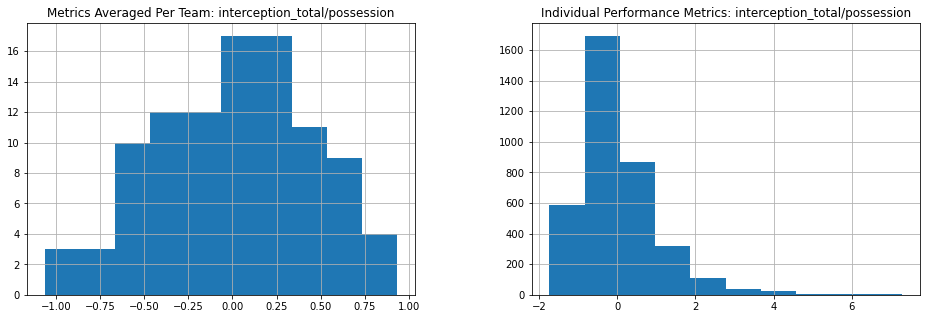

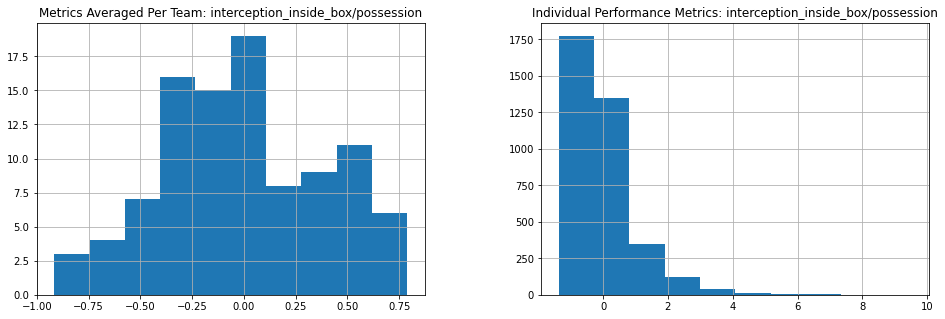

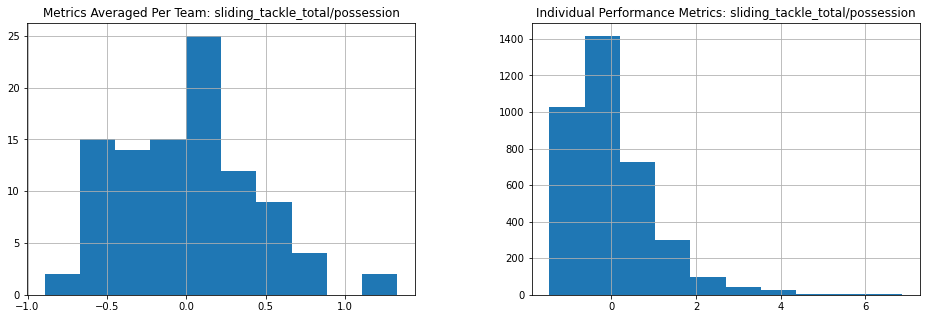

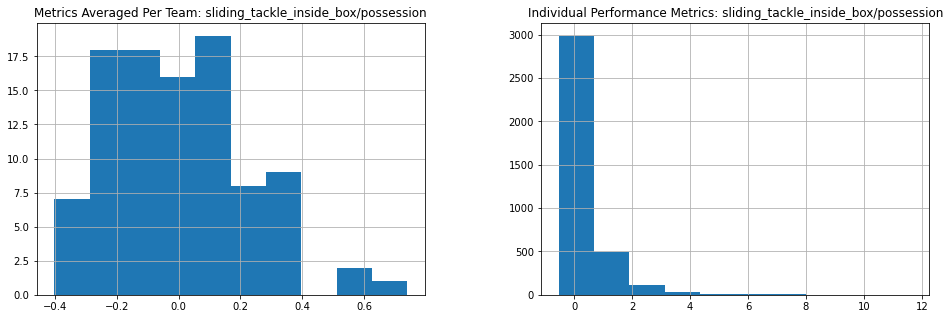

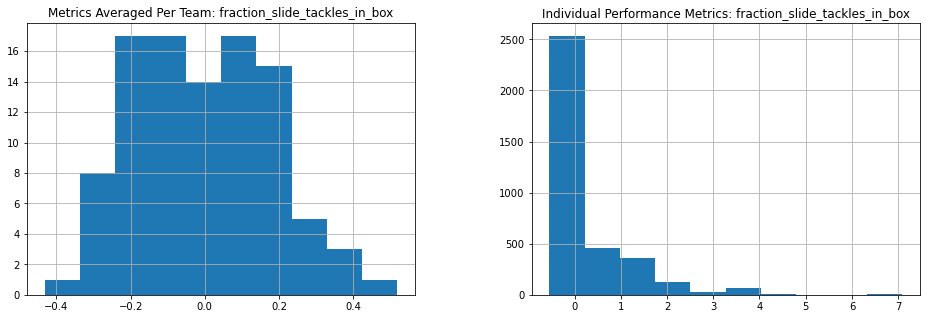

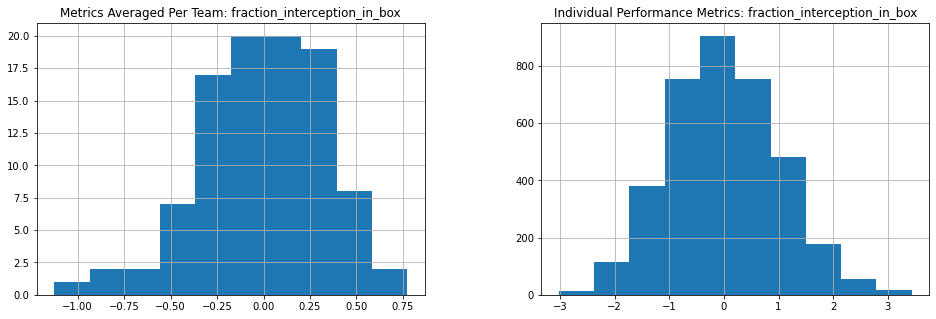

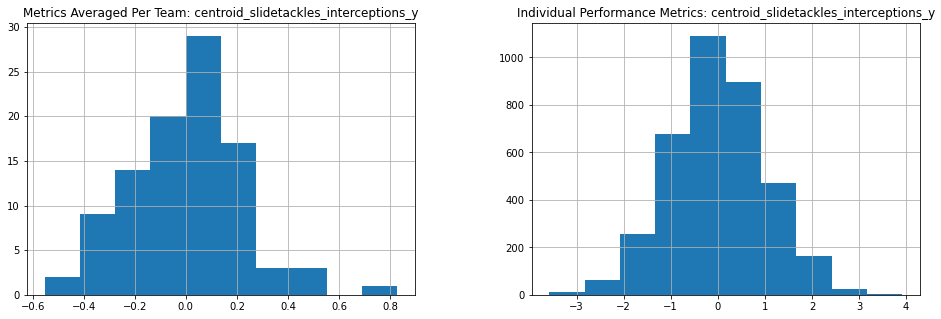

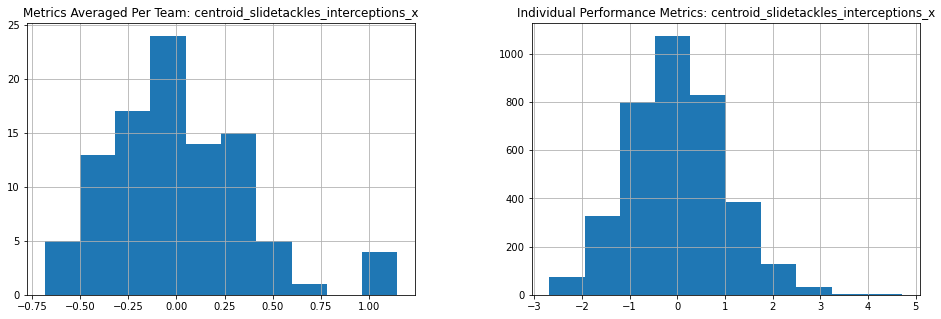

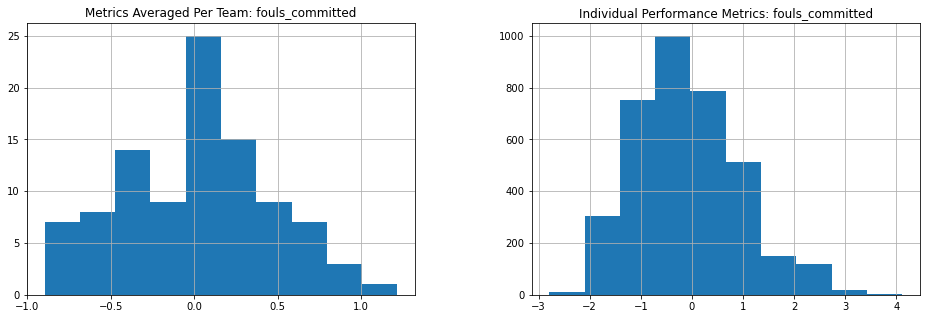

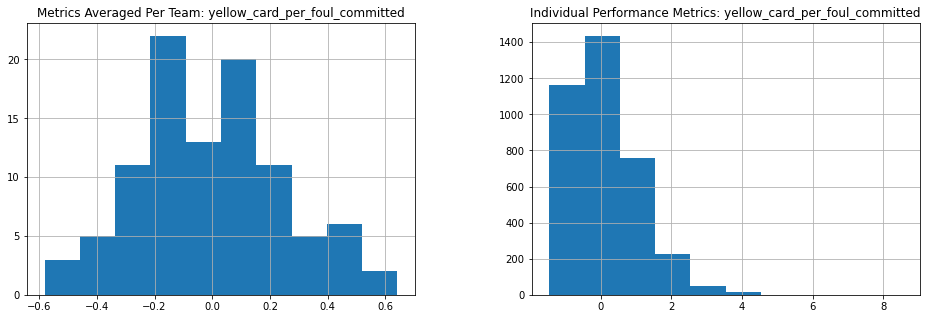

In [9]:

for c in feats_pre_aggregation.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 5))
    
    df[[c]].hist(ax = ax[0])
    ax[0].set_title('Metrics Averaged Per Team: {}'.format(c))
    
    feats_pre_aggregation[[c]].hist(ax = ax[1])
    ax[1].set_title('Individual Performance Metrics: {}'.format(c))
    
    plt.show()
    plt.close()

#### Lets look at clusters

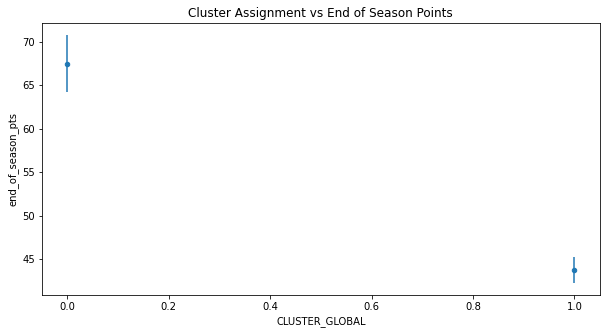

In [10]:
df_plot = df_combined[['CLUSTER_GLOBAL', 'end_of_season_pts']].groupby(['CLUSTER_GLOBAL']).mean().reset_index()
errors = df_combined[['CLUSTER_GLOBAL', 'end_of_season_pts']].groupby(['CLUSTER_GLOBAL']).sem()
df_plot.plot(kind='scatter', x='CLUSTER_GLOBAL', y='end_of_season_pts', 
             yerr=errors['end_of_season_pts'], title = 'Cluster Assignment vs End of Season Points',
            figsize = (10, 5))
plt.show()

### Does skill gap determine which cluster a team is going to?

First lets get pts_diff, the difference between your end of season pts vs the opponent's end of season pts. This is a proxy for skill.  

pts_diff > 0 if you are better than the opponent

In [11]:
feats_pre_aggregation['pts'] = [performance.loc[team, 'end_of_season_pts'] for team in feats_pre_aggregation.index.get_level_values(1)]

#getting pts diff
for matchID in feats_pre_aggregation.index.get_level_values(0).unique():
    team1, team2 = feats_pre_aggregation.loc[matchID].index
    feats_pre_aggregation.loc[(matchID, team1), 'pts_diff'] = feats_pre_aggregation.loc[(matchID, team1), 'pts'] - \
                                                                  feats_pre_aggregation.loc[(matchID, team2), 'pts']
    
    feats_pre_aggregation.loc[(matchID, team2), 'pts_diff'] = feats_pre_aggregation.loc[(matchID, team2), 'pts'] - \
                                                              feats_pre_aggregation.loc[(matchID, team1), 'pts']

feats_pre_aggregation

w  mean_passes_players  std_passes_players  \
2499719 1609  1.400745             1.315662            1.817164   
        1631 -1.568638            -1.639269           -1.387162   
2499720 1625  2.569545             2.472619            2.909521   
        1651 -1.931914            -1.959777           -1.553086   
2499721 1610  0.689988             0.929609            0.974673   
...                ...                  ...                 ...   
2576336 3315 -0.723628            -0.748099           -0.795534   
2576337 3164  0.137178             0.348725            0.327341   
        3204 -0.518298            -0.366856           -0.862164   
2576338 3185 -0.715730            -0.748099           -1.222509   
        3193  0.816345             0.737184            0.032243   

              mean_passes_zone  std_passes_zone  passing_lane_cluster  \
2499719 1609          1.824312         1.129991               1.09469   
        1631         -1.488371        -1.152262              -0.91325   
2499720 1625          2.658804         4.147272               1.09469   
        1651         -1.766535        -1.087347              -0.91325   
2499721 1610          1.027751        -0.168609              -0.91325   
...                        ...              ...                   ...   
2576336 3315         -0.881467        -1.285916              -0.91325   
2576337 3164          0.344984         0.435053               1.09469   
        3204         -0.818248        -0.531391               1.09469   
2576338 3185         -0.742385        -0.746227              -0.91325   
        3193          0.382915         0.598789               1.09469   

              advance_ratio  avg_clustering_coefficient  \
2499719 1609       0.686695                    0.366557   
        1631      -1.027680                   -1.393692   
2499720 1625       1.893703                    0.900622   
        1651      -0.968175                   -3.551018   
2499721 1610       0.391009                    0.938874   
...                     ...                         ...   
2576336 3315      -0.317484                   -0.189960   
2576337 3164      -0.669356                    0.768236   
        3204       0.416566                    0.195956   
2576338 3185       0.263584                   -1.766189   
        3193       0.835984                    0.795511   

              algebraic_connectivity  avg_shortest_path_all_pairs  ...  \
2499719 1609               -0.741488                    -0.197105  ...   
        1631               -0.483736                     2.127978  ...   
2499720 1625                0.433618                    -1.518342  ...   
        1651               -0.790886                     2.137061  ...   
2499721 1610               -0.166679                    -0.792769  ...   
...                              ...                          ...  ...   
2576336 3315                0.232431                    -0.143708  ...   
2576337 3164                0.966201                    -0.775300  ...   
        3204                2.131564                    -0.648692  ...   
2576338 3185                0.290519                     0.120337  ...   
        3193                2.160624                    -1.327240  ...   

              sliding_tackle_total/possession  \
2499719 1609                        -1.136347   
        1631                         1.596021   
2499720 1625                        -1.019146   
        1651                         1.601520   
2499721 1610                         0.426794   
...                                       ...   
2576336 3315                         0.326295   
2576337 3164                        -1.031708   
        3204                         0.410427   
2576338 3185                         0.081507   
        3193                        -0.680766   

              sliding_tackle_inside_box/possession  \
2499719 1609                             -0.526459   
        1631                             -0.

array([[<AxesSubplot:title={'center':'pts_diff'}>]], dtype=object)

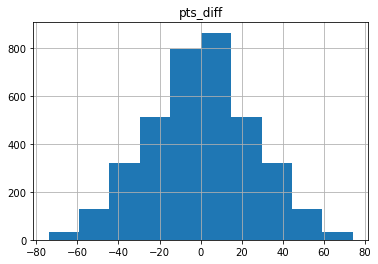

In [12]:
feats_pre_aggregation[['pts_diff']].hist()

In [14]:
feats_pre_aggregation['skill_gap'] = pd.cut(feats_pre_aggregation['pts_diff'],
                                      bins=[-100, -10, 10, 100],
                                      labels = [-1, 0, 1])

feats_pre_aggregation['performance_cluster'] = kmeans_classifier.predict(feats_pre_aggregation.drop(columns=['pts', 'pts_diff', 'skill_gap']).fillna(0))

display(feats_pre_aggregation)

w  mean_passes_players  std_passes_players  \
2499719 1609  1.400745             1.315662            1.817164   
        1631 -1.568638            -1.639269           -1.387162   
2499720 1625  2.569545             2.472619            2.909521   
        1651 -1.931914            -1.959777           -1.553086   
2499721 1610  0.689988             0.929609            0.974673   
...                ...                  ...                 ...   
2576336 3315 -0.723628            -0.748099           -0.795534   
2576337 3164  0.137178             0.348725            0.327341   
        3204 -0.518298            -0.366856           -0.862164   
2576338 3185 -0.715730            -0.748099           -1.222509   
        3193  0.816345             0.737184            0.032243   

              mean_passes_zone  std_passes_zone  passing_lane_cluster  \
2499719 1609          1.824312         1.129991               1.09469   
        1631         -1.488371        -1.152262              -0.91325   
2499720 1625          2.658804         4.147272               1.09469   
        1651         -1.766535        -1.087347              -0.91325   
2499721 1610          1.027751        -0.168609              -0.91325   
...                        ...              ...                   ...   
2576336 3315         -0.881467        -1.285916              -0.91325   
2576337 3164          0.344984         0.435053               1.09469   
        3204         -0.818248        -0.531391               1.09469   
2576338 3185         -0.742385        -0.746227              -0.91325   
        3193          0.382915         0.598789               1.09469   

              advance_ratio  avg_clustering_coefficient  \
2499719 1609       0.686695                    0.366557   
        1631      -1.027680                   -1.393692   
2499720 1625       1.893703                    0.900622   
        1651      -0.968175                   -3.551018   
2499721 1610       0.391009                    0.938874   
...                     ...                         ...   
2576336 3315      -0.317484                   -0.189960   
2576337 3164      -0.669356                    0.768236   
        3204       0.416566                    0.195956   
2576338 3185       0.263584                   -1.766189   
        3193       0.835984                    0.795511   

              algebraic_connectivity  avg_shortest_path_all_pairs  ...  \
2499719 1609               -0.741488                    -0.197105  ...   
        1631               -0.483736                     2.127978  ...   
2499720 1625                0.433618                    -1.518342  ...   
        1651               -0.790886                     2.137061  ...   
2499721 1610               -0.166679                    -0.792769  ...   
...                              ...                          ...  ...   
2576336 3315                0.232431                    -0.143708  ...   
2576337 3164                0.966201                    -0.775300  ...   
        3204                2.131564                    -0.648692  ...   
2576338 3185                0.290519                     0.120337  ...   
        3193                2.160624                    -1.327240  ...   

              fraction_slide_tackles_in_box  fraction_interception_in_box  \
2499719 1609                      -0.548481                     -1.416287   
        1631                      -0.548481                      0.744424   
2499720 1625                      -0.548481                     -2.103786   
        1651                       0.978168                      0.714111   
2499721 1610                      -0.548481                     -1.322923   
...                                     ...                           ...   
2576336 3315                      -0.548481                      1.354543   
2576337 3164                      -0.548481                      0.908115   
        3204                      -0.548481     

In [15]:
aggr_stats = dict()

for team in feats_pre_aggregation.index.get_level_values(1).unique():
    tmp = feats_pre_aggregation.loc[feats_pre_aggregation.index.get_level_values(1)==team,
                             ['skill_gap', 'performance_cluster', 'w']].groupby(['skill_gap', 'performance_cluster']).count()
    tmp.columns = ['counts']
    aggr_stats[team] = tmp.fillna(0)
    
aggr_stats = pd.concat(aggr_stats).unstack().droplevel(0, axis=1)
aggr_stats.index.name = ('teamID', 'skill_gap')
aggr_stats

performance_cluster     0     1
     skill_gap                 
1609 -1               5.0   3.0
     0                3.0   1.0
     1               26.0   0.0
1631 -1               0.0  12.0
     0                6.0  12.0
...                   ...   ...
3163 0                4.0  10.0
     1                2.0   2.0
3165 -1               1.0  19.0
     0                6.0   8.0
     1                3.0   1.0

[294 rows x 2 columns]

<AxesSubplot:title={'center':'Newcastle United, Team Cluster From Previous Investigation: 1'}, xlabel='skill_gap'>

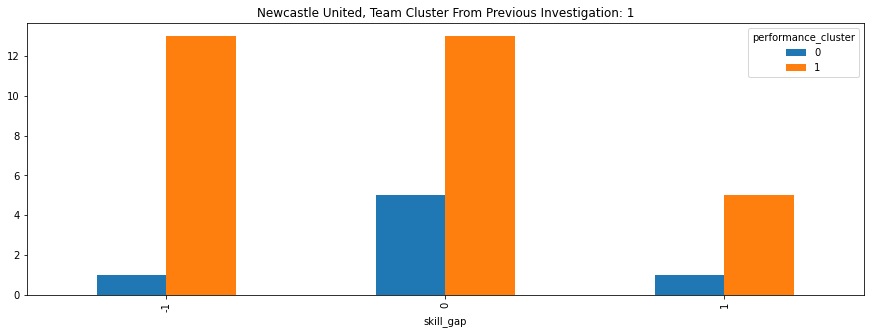

In [16]:
aggr_stats.loc[1613].plot(kind='bar', title='Newcastle United, Team Cluster From Previous Investigation: 1', figsize=(15, 5))

In [17]:
aggr_stats

performance_cluster     0     1
     skill_gap                 
1609 -1               5.0   3.0
     0                3.0   1.0
     1               26.0   0.0
1631 -1               0.0  12.0
     0                6.0  12.0
...                   ...   ...
3163 0                4.0  10.0
     1                2.0   2.0
3165 -1               1.0  19.0
     0                6.0   8.0
     1                3.0   1.0

[294 rows x 2 columns]

### Remark
Lets see a breakdown of skill difference and cluster assignment for each performance for a given team, and compare it to the global cluster we put the team in previously. We'll generate bar plots for all teams

<Figure size 432x288 with 0 Axes>

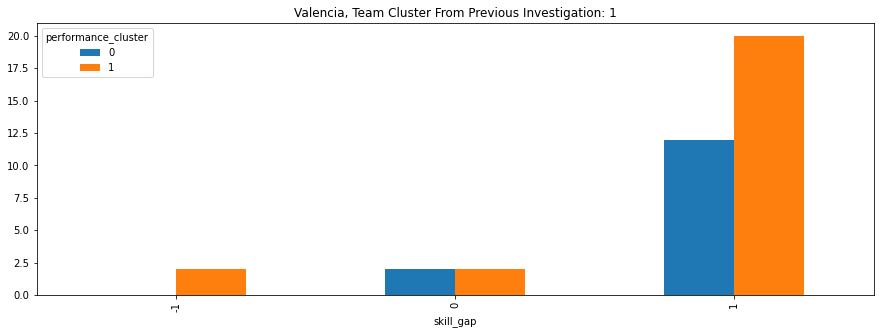

<Figure size 432x288 with 0 Axes>

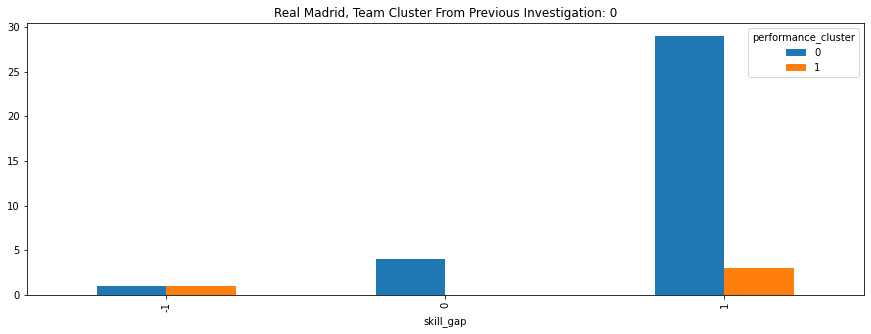

<Figure size 432x288 with 0 Axes>

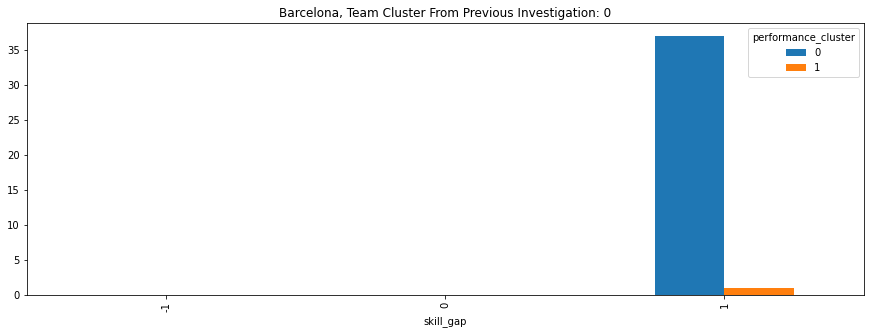

<Figure size 432x288 with 0 Axes>

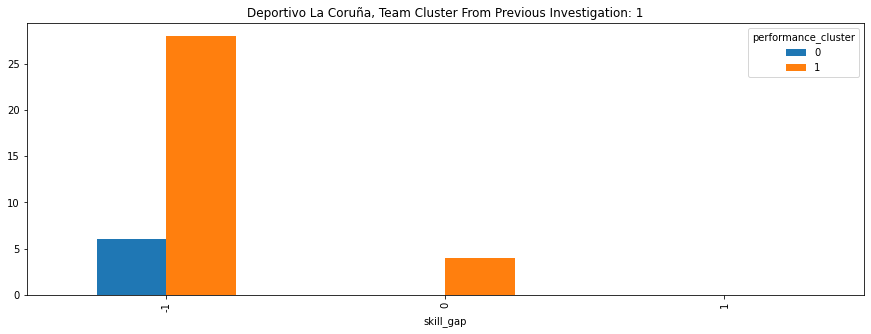

<Figure size 432x288 with 0 Axes>

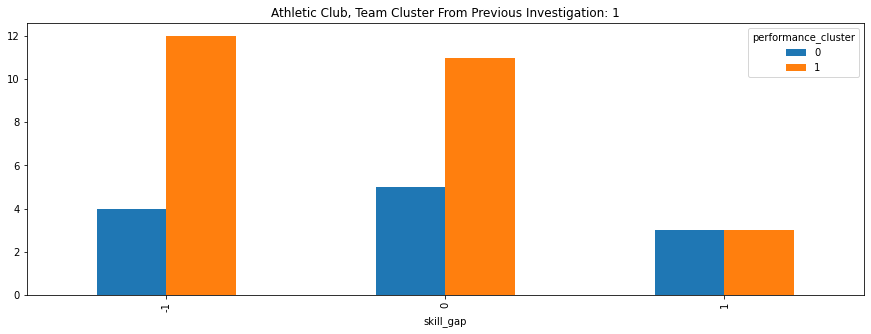

<Figure size 432x288 with 0 Axes>

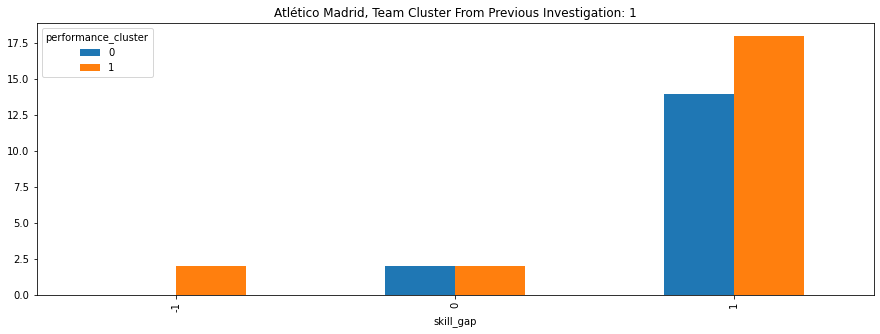

<Figure size 432x288 with 0 Axes>

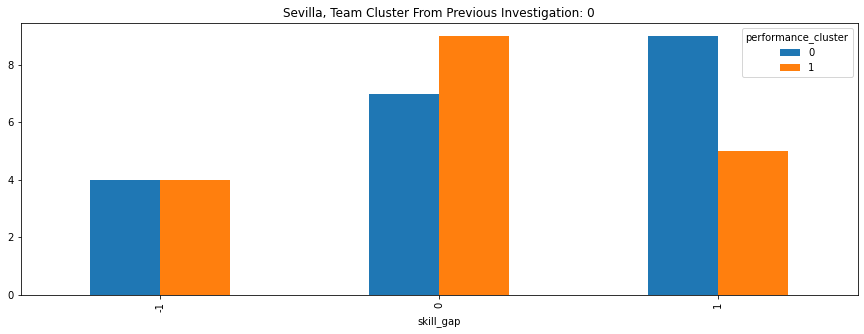

<Figure size 432x288 with 0 Axes>

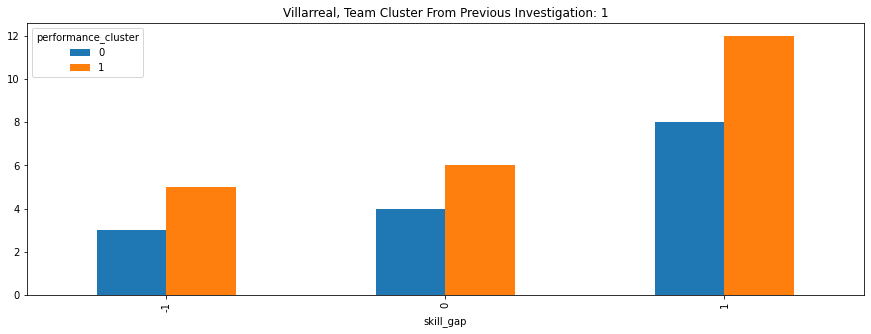

<Figure size 432x288 with 0 Axes>

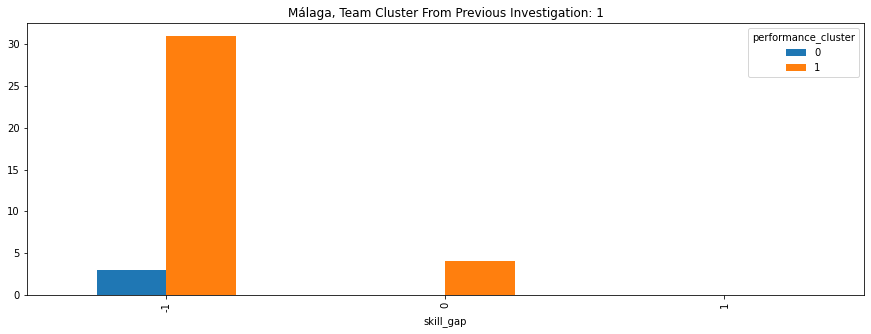

<Figure size 432x288 with 0 Axes>

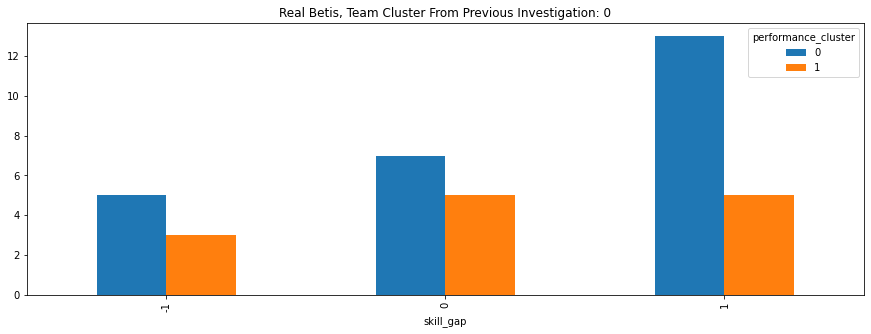

<Figure size 432x288 with 0 Axes>

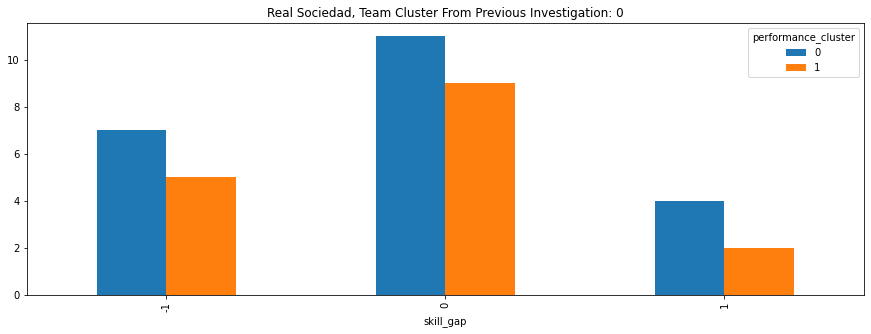

<Figure size 432x288 with 0 Axes>

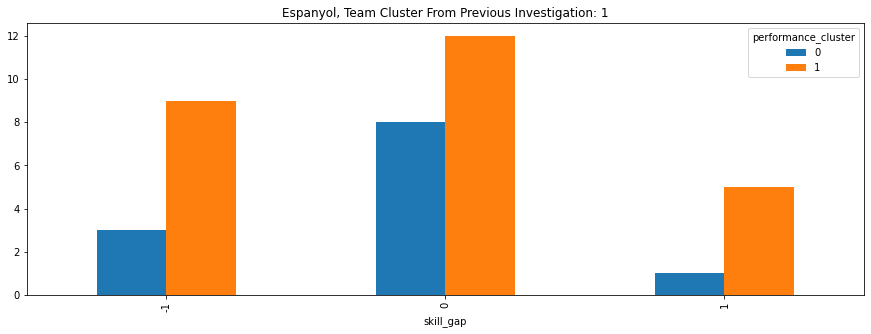

<Figure size 432x288 with 0 Axes>

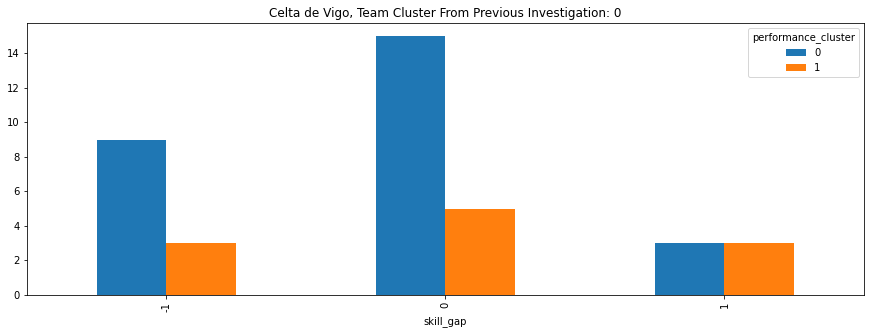

<Figure size 432x288 with 0 Axes>

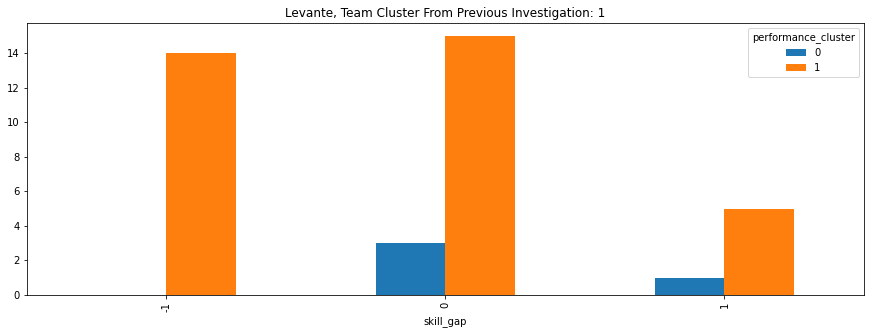

<Figure size 432x288 with 0 Axes>

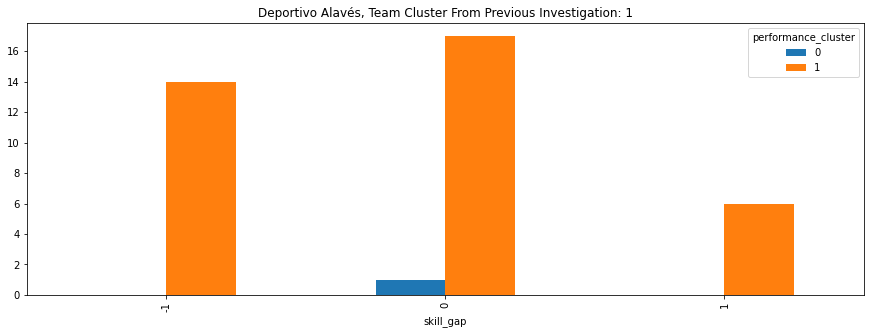

<Figure size 432x288 with 0 Axes>

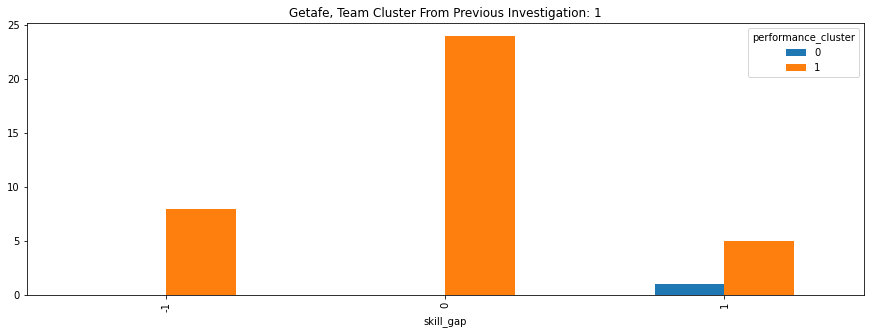

<Figure size 432x288 with 0 Axes>

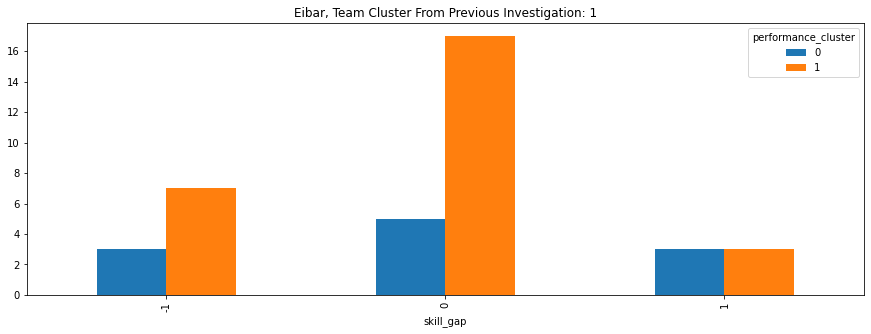

<Figure size 432x288 with 0 Axes>

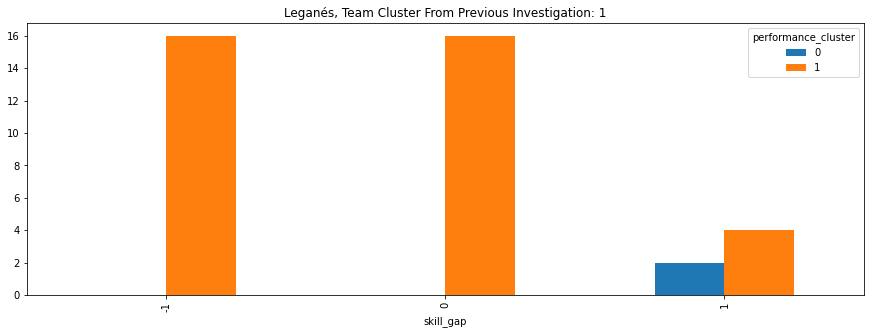

<Figure size 432x288 with 0 Axes>

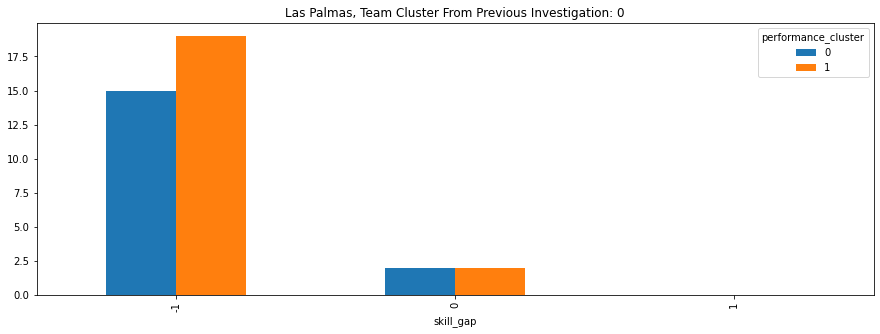

<Figure size 432x288 with 0 Axes>

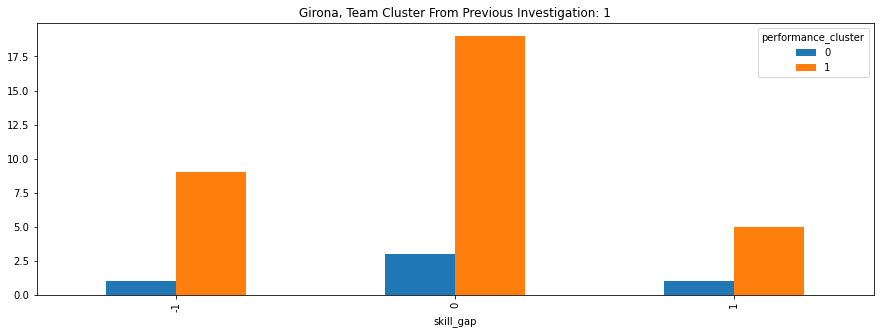

<Figure size 432x288 with 0 Axes>

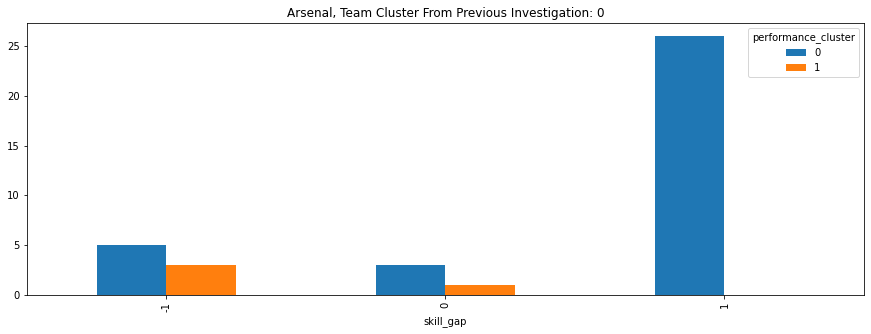

<Figure size 432x288 with 0 Axes>

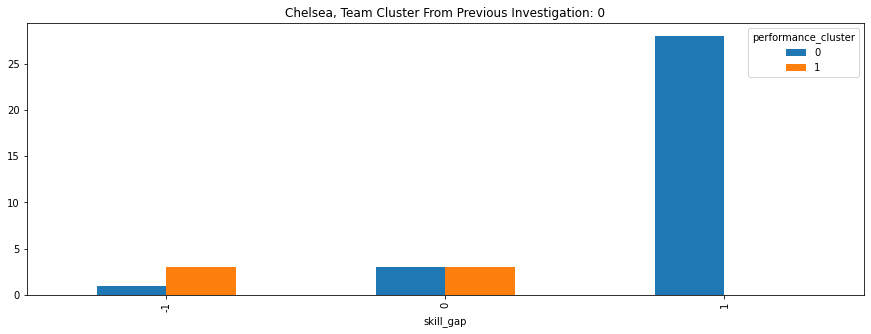

<Figure size 432x288 with 0 Axes>

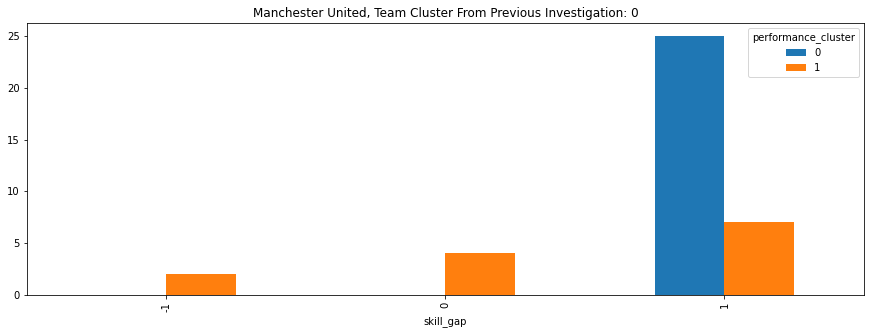

<Figure size 432x288 with 0 Axes>

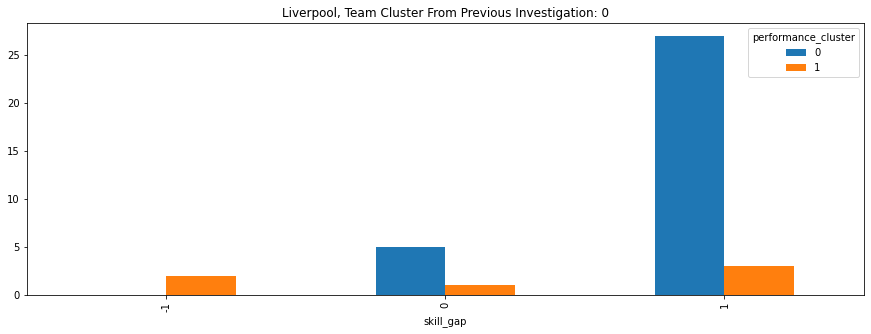

<Figure size 432x288 with 0 Axes>

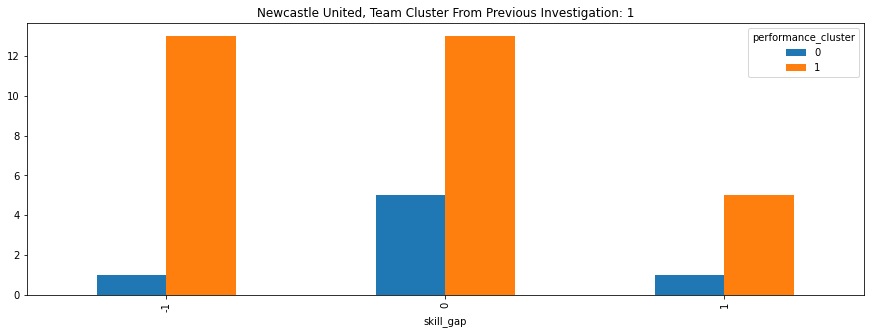

<Figure size 432x288 with 0 Axes>

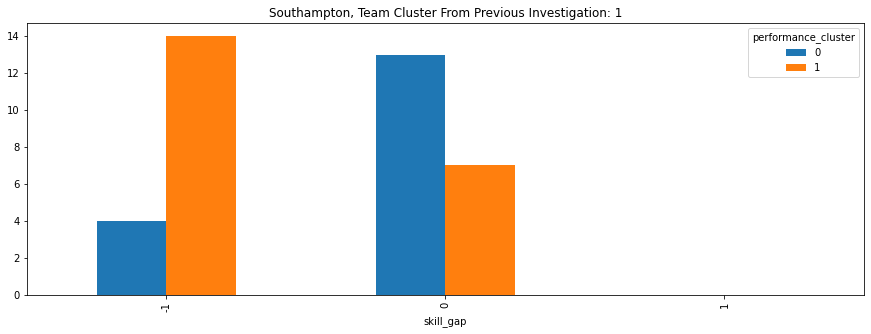

<Figure size 432x288 with 0 Axes>

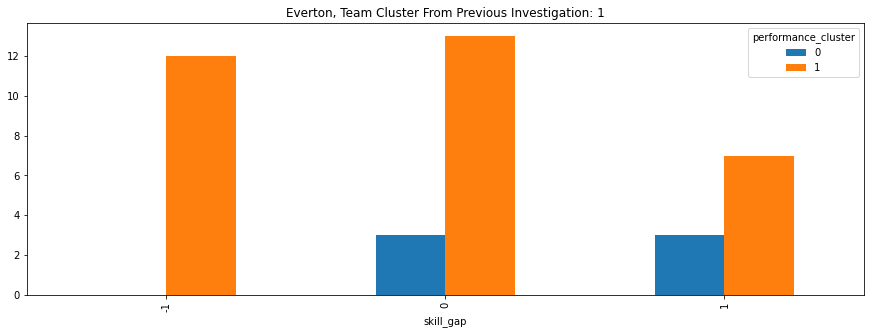

<Figure size 432x288 with 0 Axes>

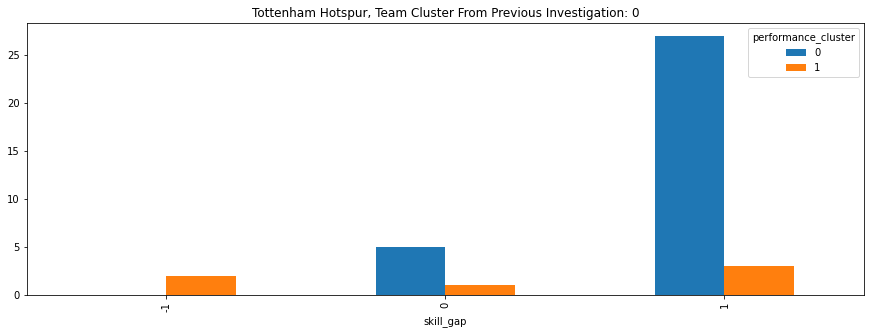

<Figure size 432x288 with 0 Axes>

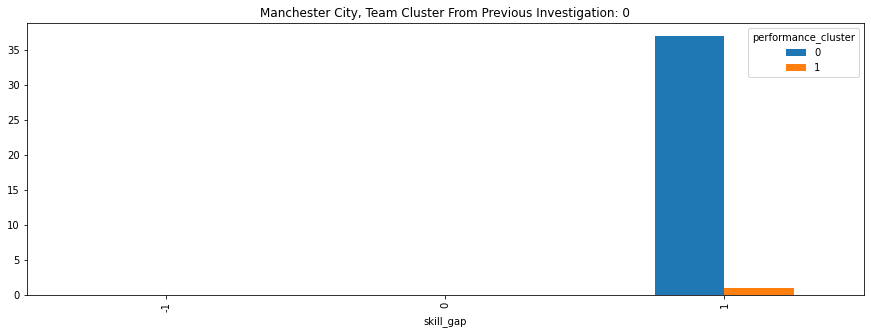

<Figure size 432x288 with 0 Axes>

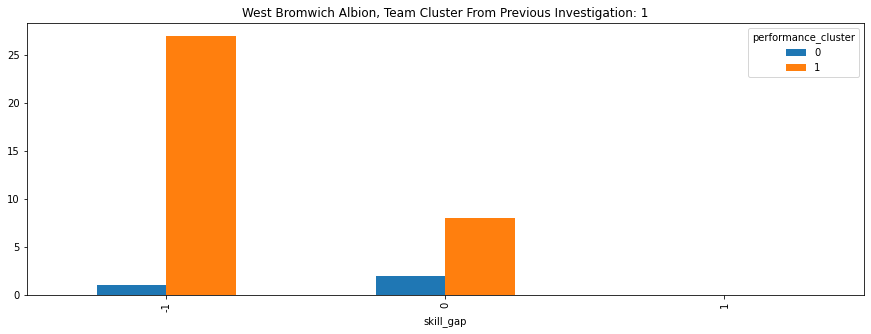

<Figure size 432x288 with 0 Axes>

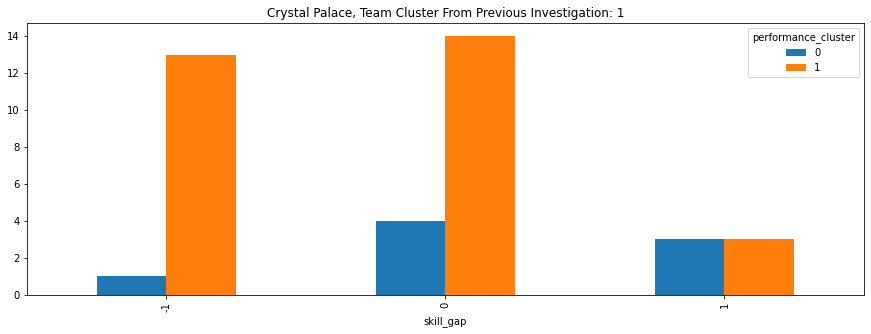

<Figure size 432x288 with 0 Axes>

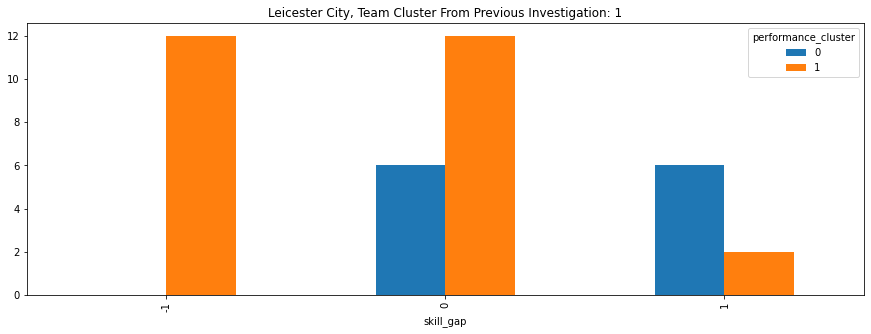

<Figure size 432x288 with 0 Axes>

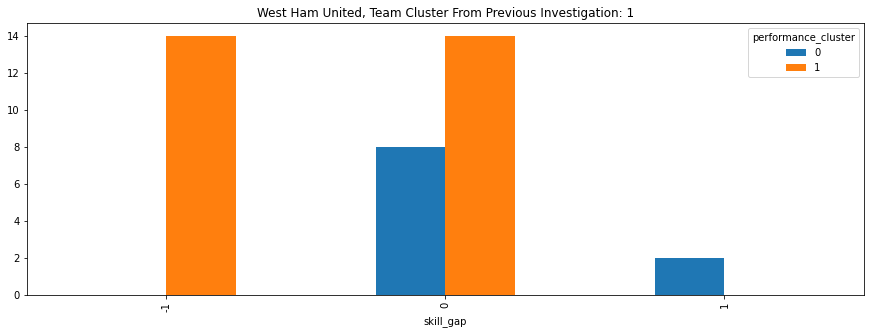

<Figure size 432x288 with 0 Axes>

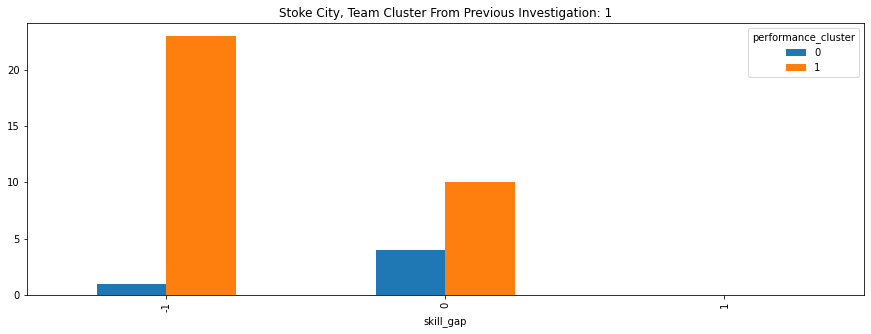

<Figure size 432x288 with 0 Axes>

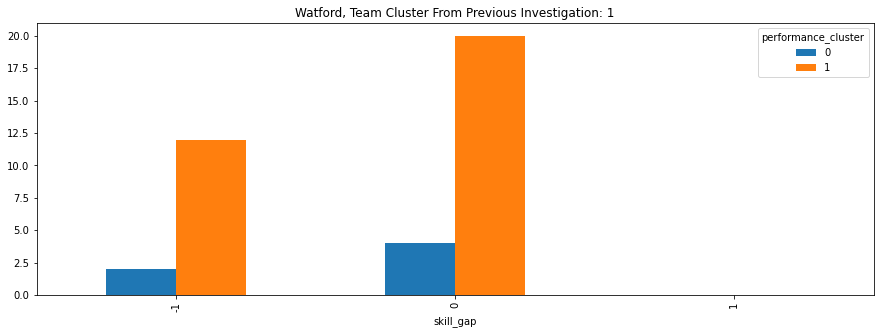

<Figure size 432x288 with 0 Axes>

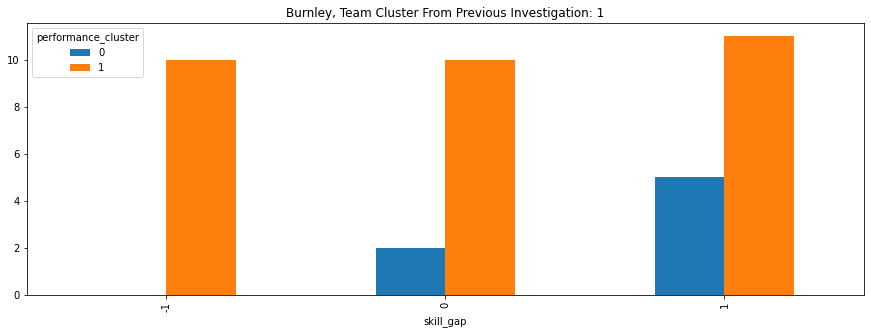

<Figure size 432x288 with 0 Axes>

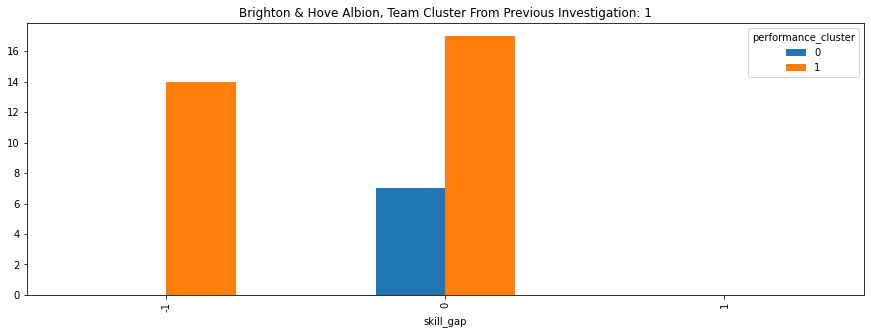

<Figure size 432x288 with 0 Axes>

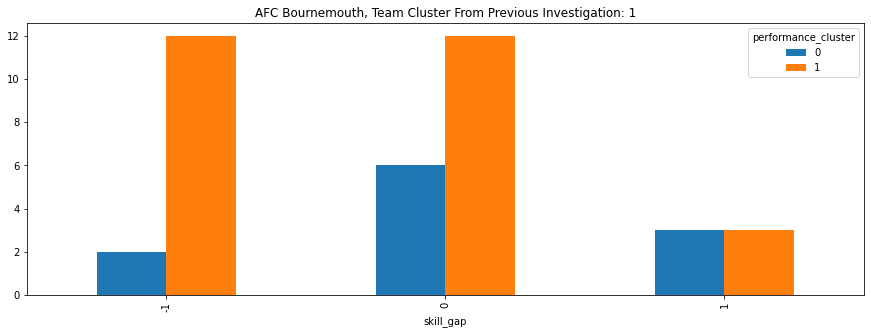

<Figure size 432x288 with 0 Axes>

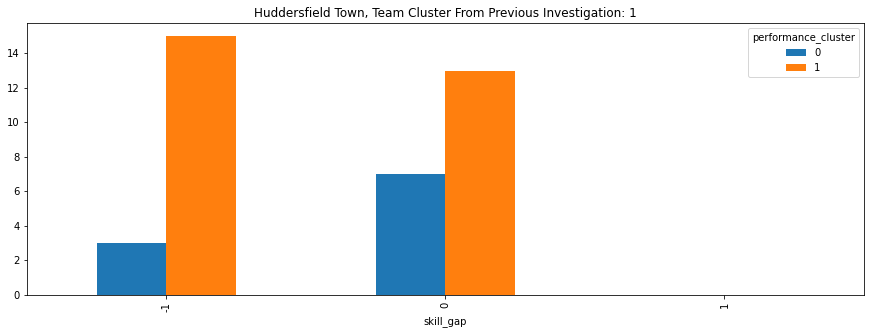

<Figure size 432x288 with 0 Axes>

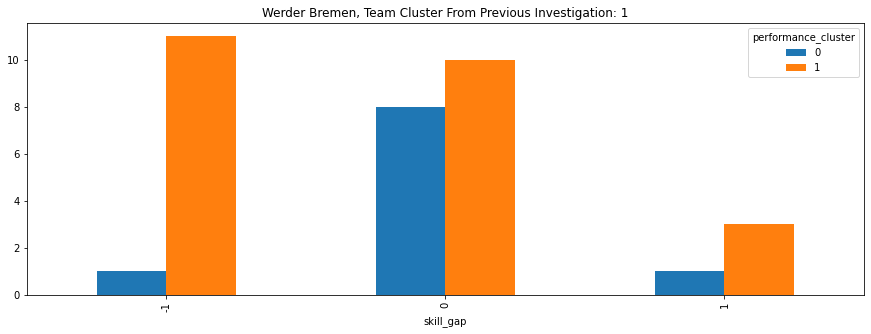

<Figure size 432x288 with 0 Axes>

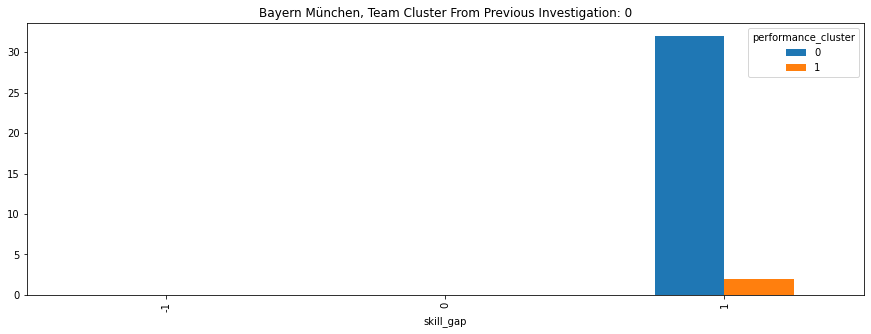

<Figure size 432x288 with 0 Axes>

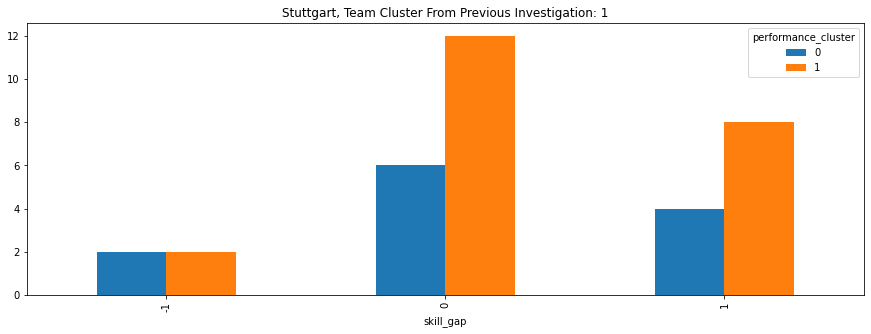

<Figure size 432x288 with 0 Axes>

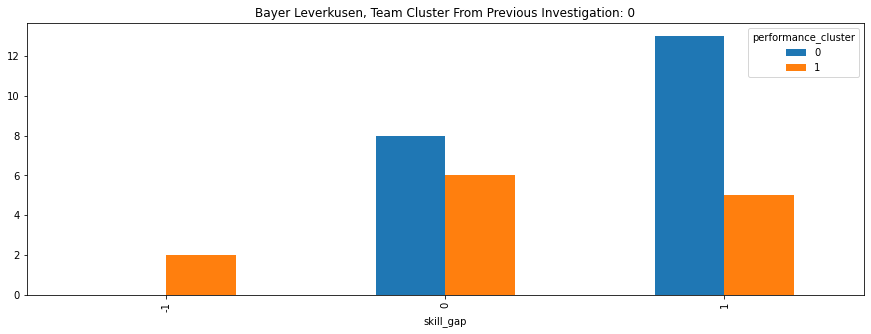

<Figure size 432x288 with 0 Axes>

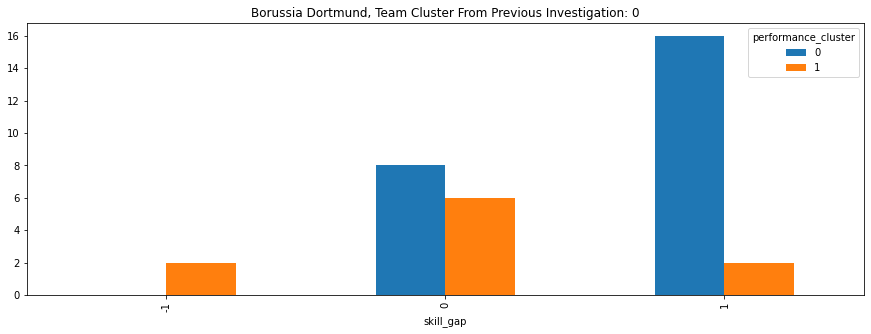

<Figure size 432x288 with 0 Axes>

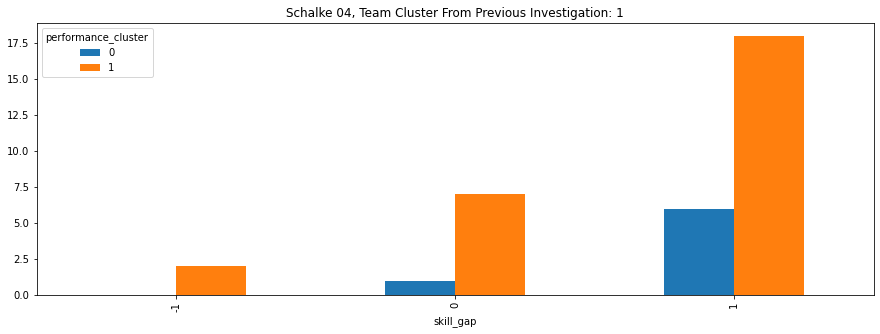

<Figure size 432x288 with 0 Axes>

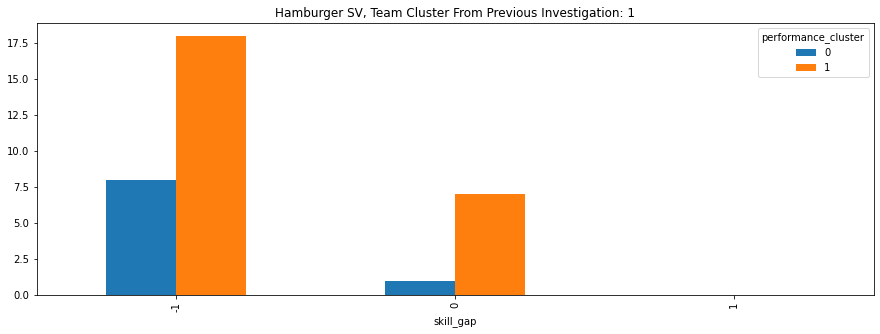

<Figure size 432x288 with 0 Axes>

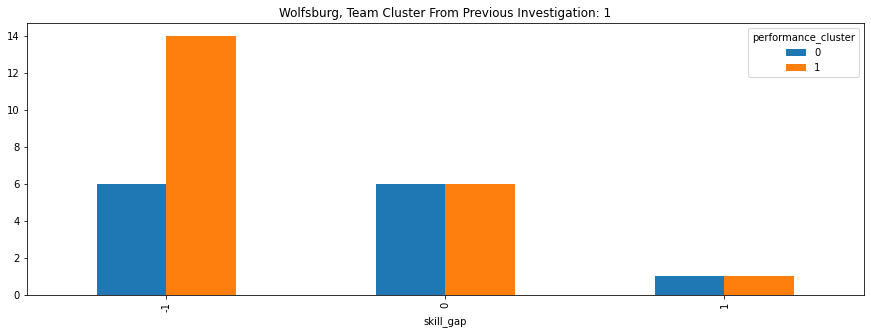

<Figure size 432x288 with 0 Axes>

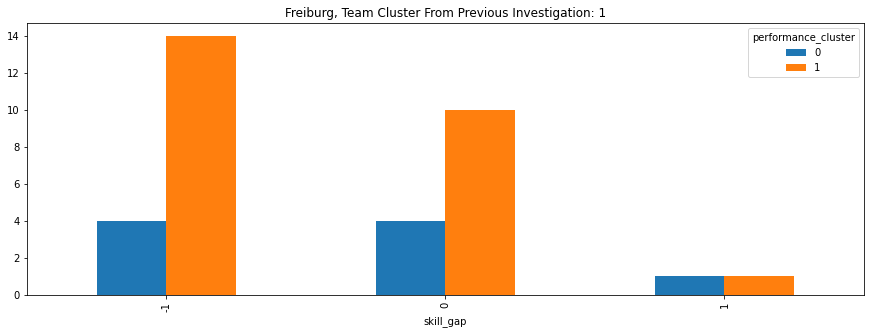

<Figure size 432x288 with 0 Axes>

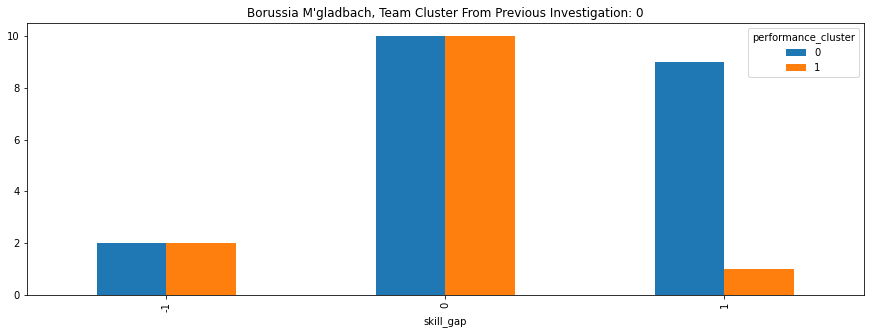

<Figure size 432x288 with 0 Axes>

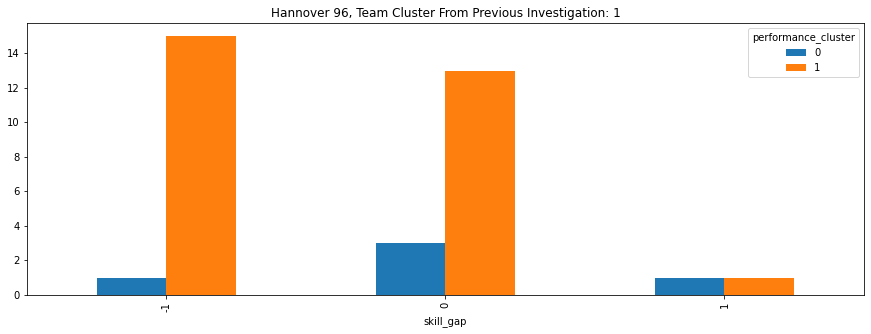

<Figure size 432x288 with 0 Axes>

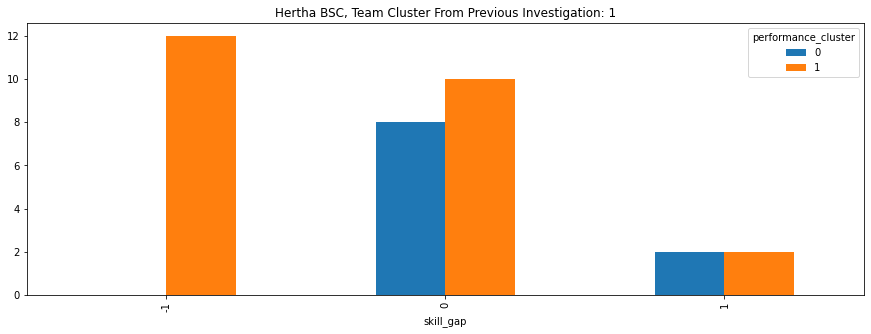

<Figure size 432x288 with 0 Axes>

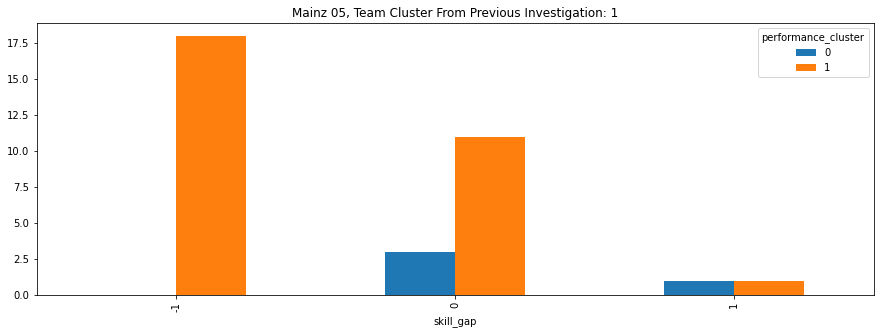

<Figure size 432x288 with 0 Axes>

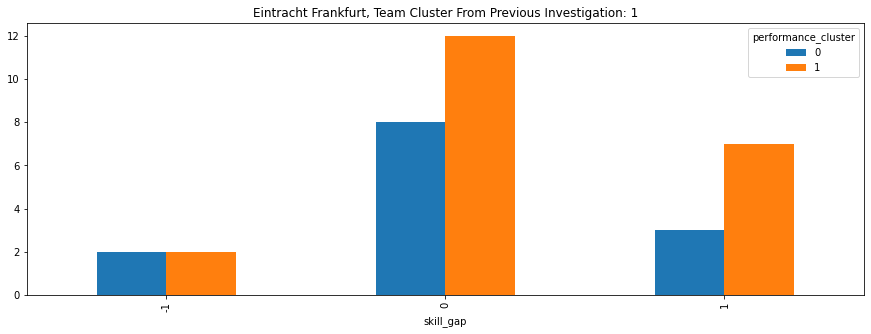

<Figure size 432x288 with 0 Axes>

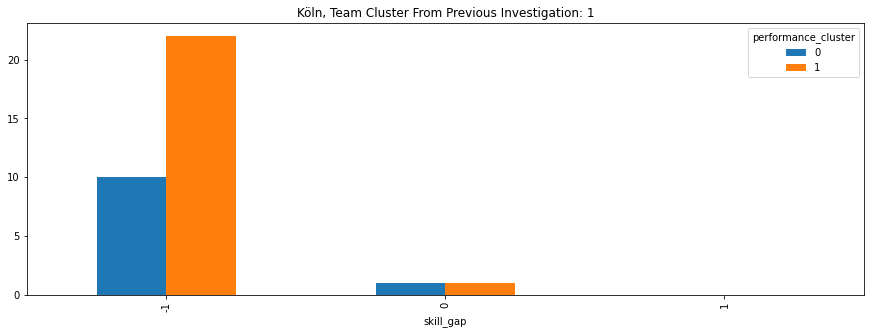

<Figure size 432x288 with 0 Axes>

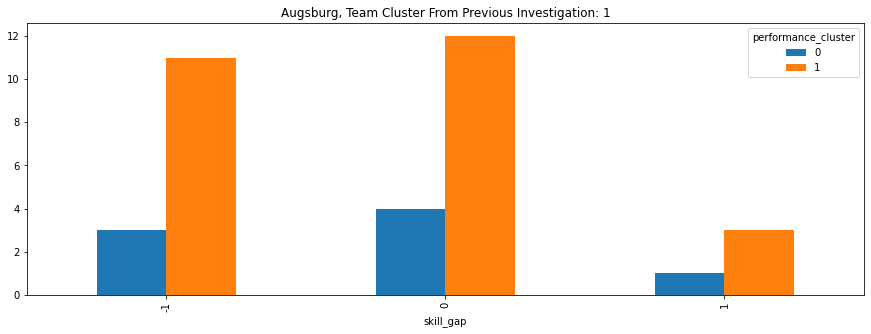

<Figure size 432x288 with 0 Axes>

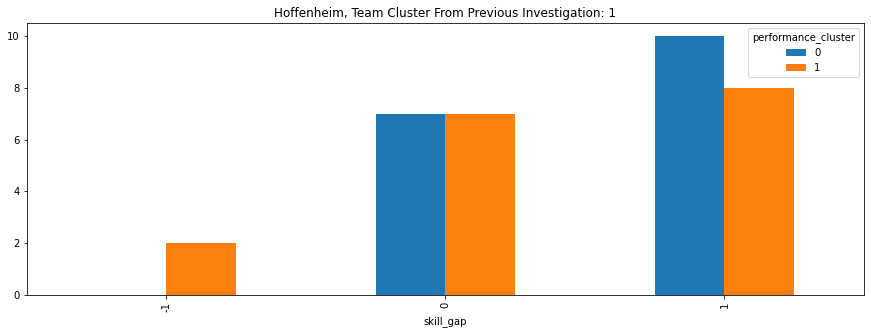

<Figure size 432x288 with 0 Axes>

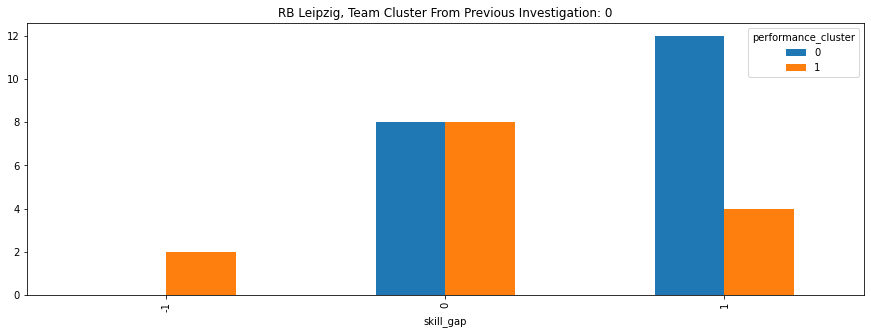

<Figure size 432x288 with 0 Axes>

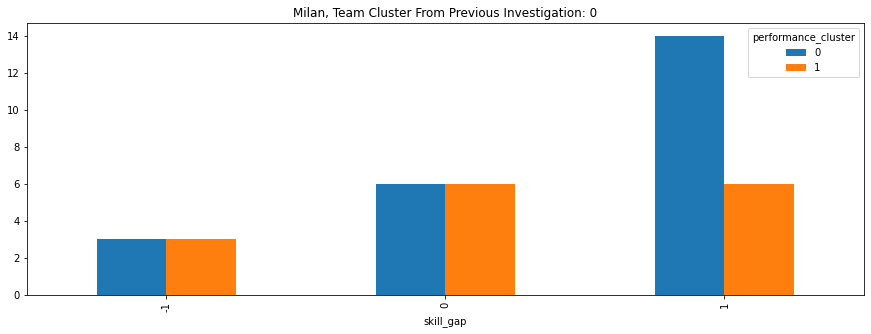

<Figure size 432x288 with 0 Axes>

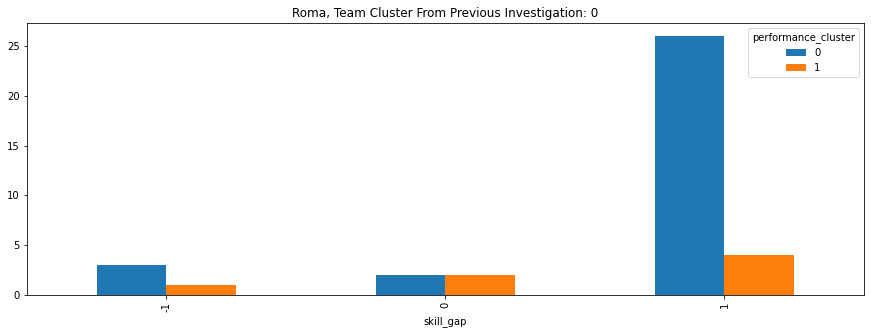

<Figure size 432x288 with 0 Axes>

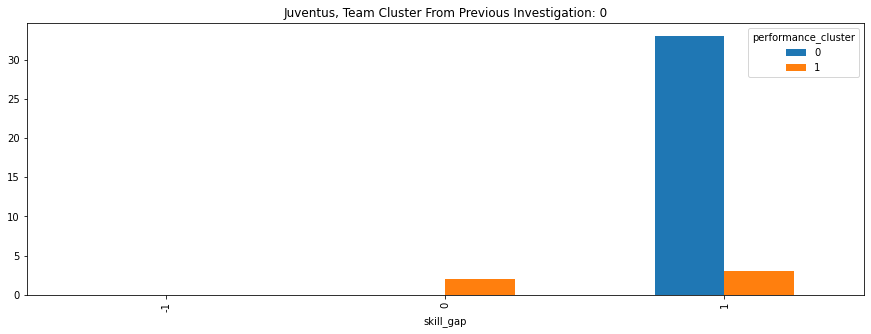

<Figure size 432x288 with 0 Axes>

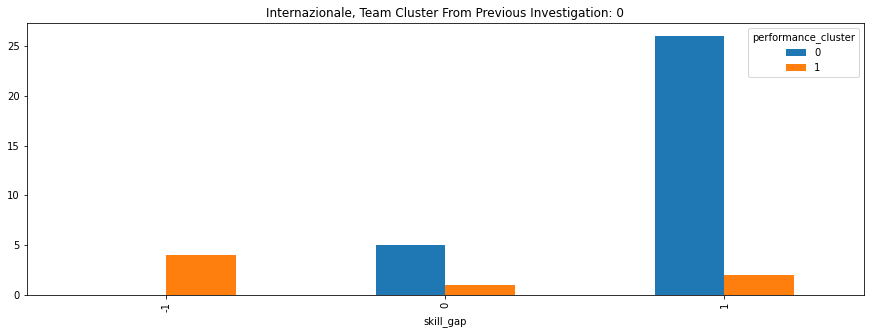

<Figure size 432x288 with 0 Axes>

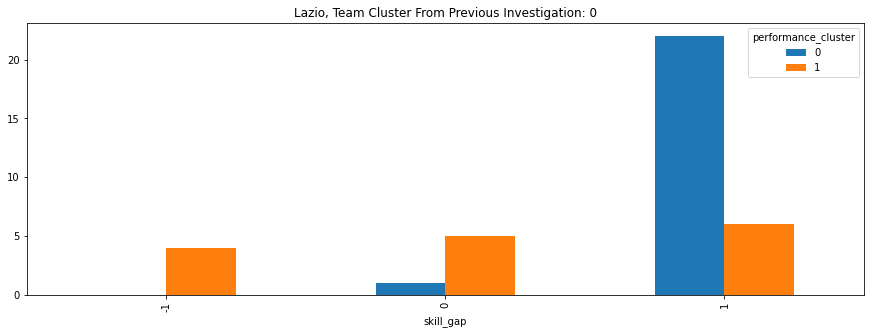

<Figure size 432x288 with 0 Axes>

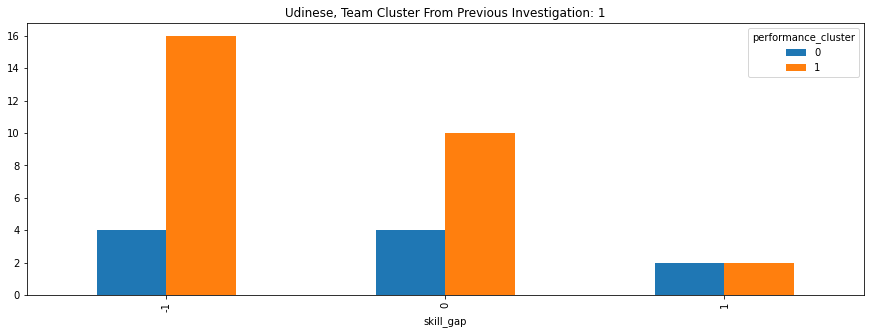

<Figure size 432x288 with 0 Axes>

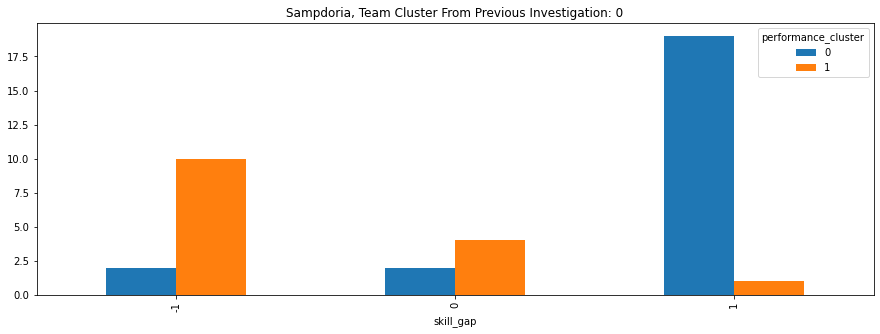

<Figure size 432x288 with 0 Axes>

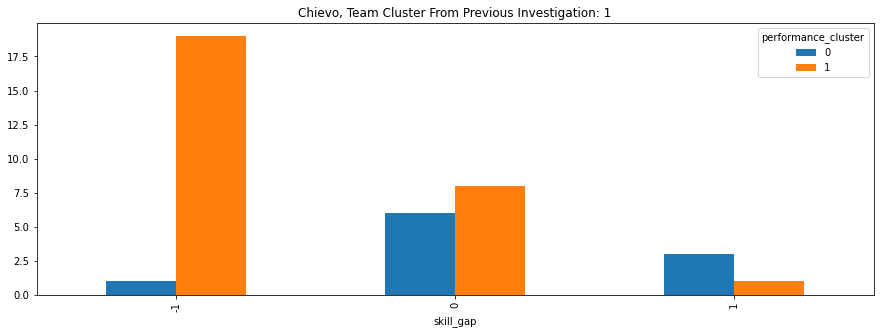

<Figure size 432x288 with 0 Axes>

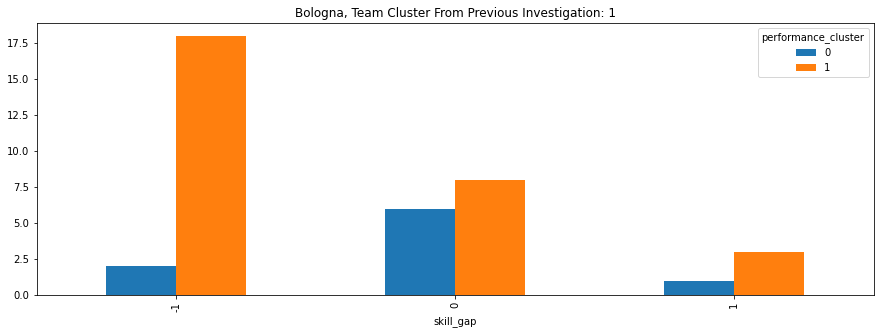

<Figure size 432x288 with 0 Axes>

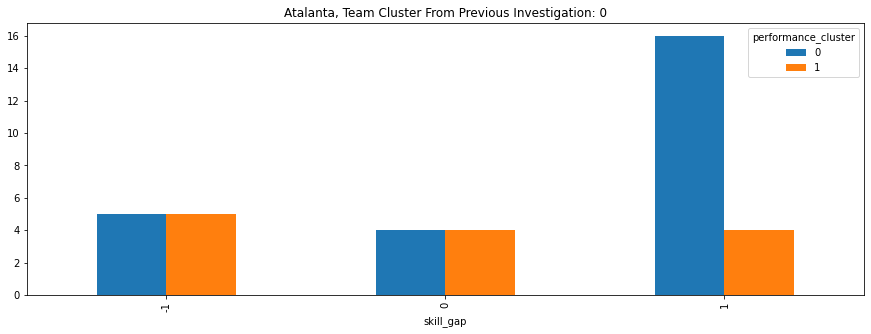

<Figure size 432x288 with 0 Axes>

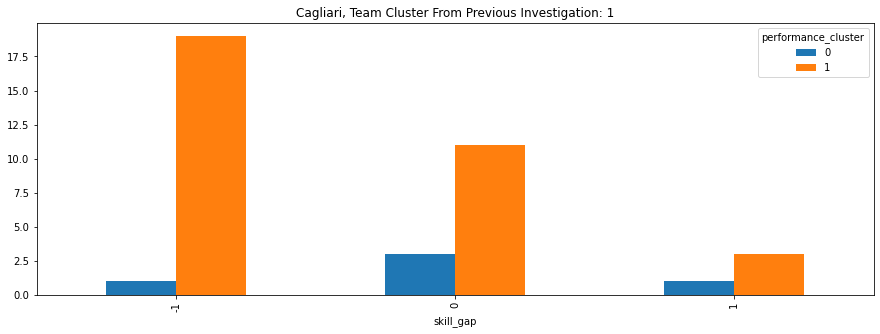

<Figure size 432x288 with 0 Axes>

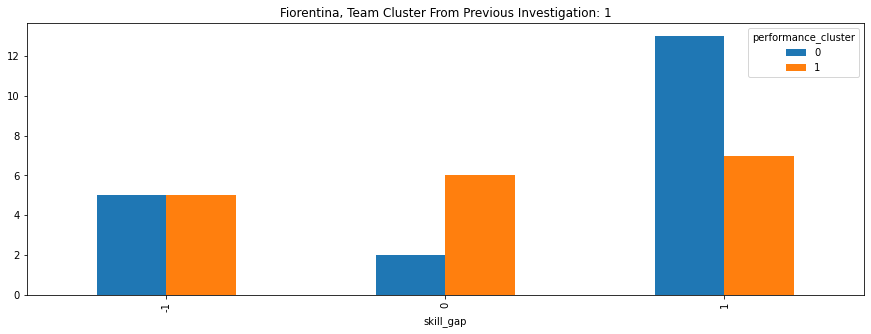

<Figure size 432x288 with 0 Axes>

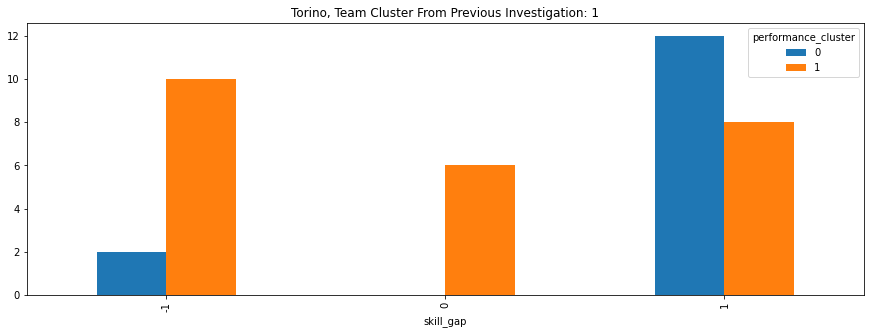

<Figure size 432x288 with 0 Axes>

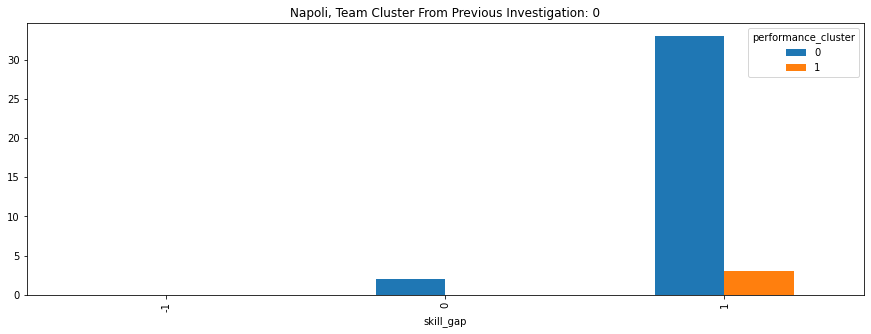

<Figure size 432x288 with 0 Axes>

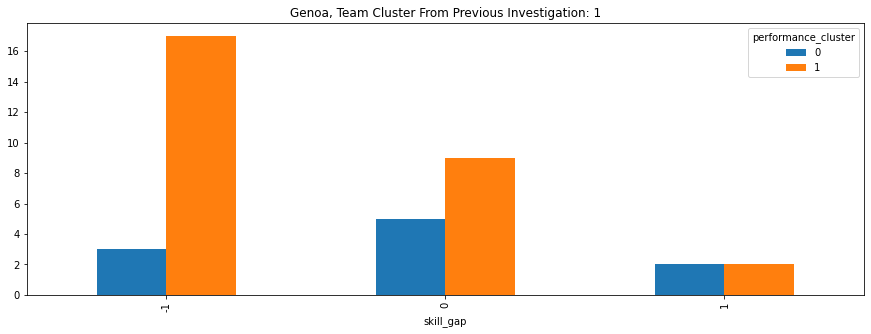

<Figure size 432x288 with 0 Axes>

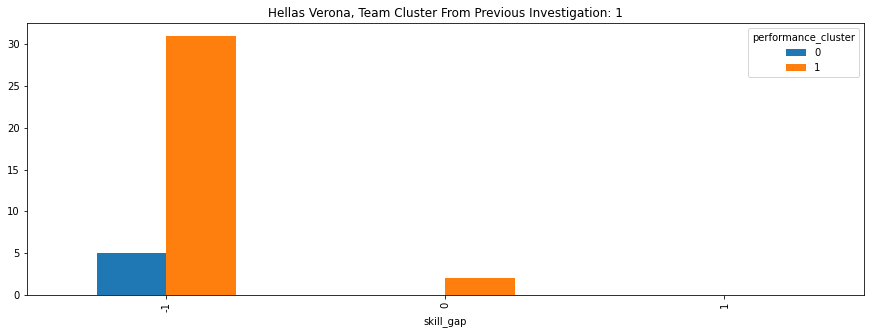

<Figure size 432x288 with 0 Axes>

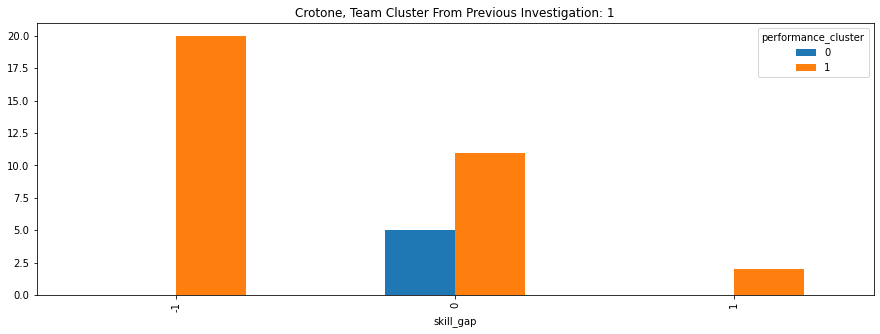

<Figure size 432x288 with 0 Axes>

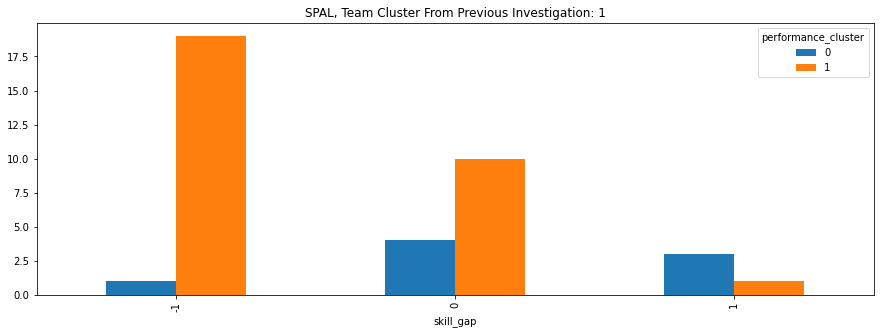

<Figure size 432x288 with 0 Axes>

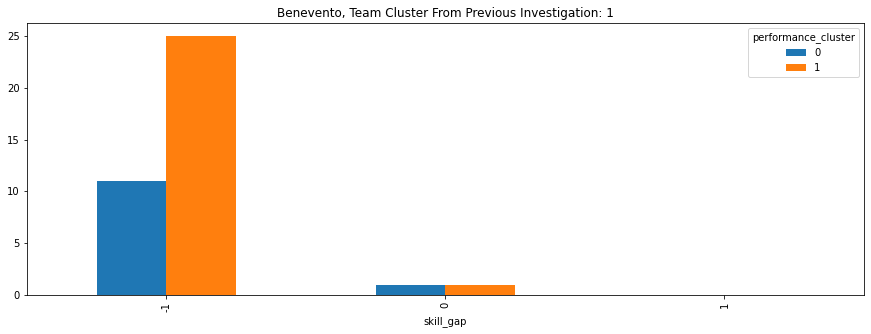

<Figure size 432x288 with 0 Axes>

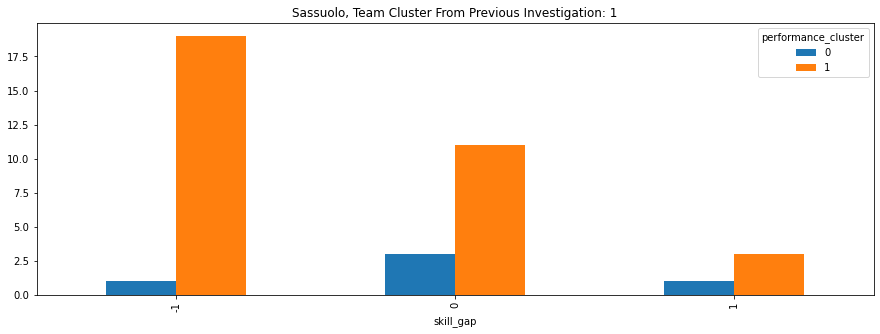

<Figure size 432x288 with 0 Axes>

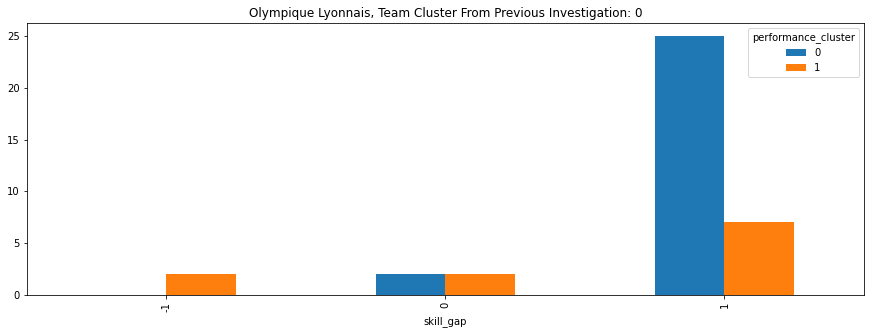

<Figure size 432x288 with 0 Axes>

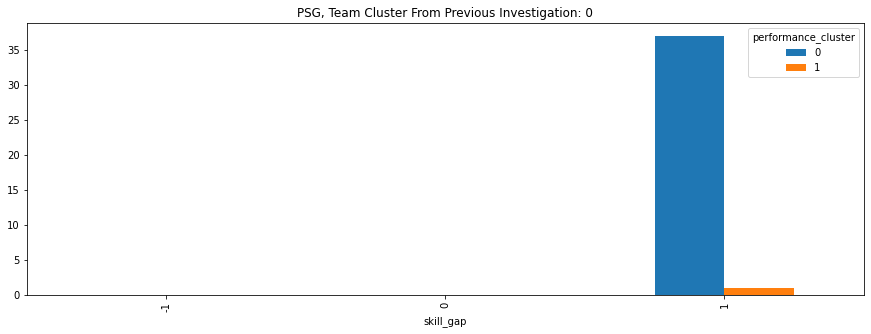

<Figure size 432x288 with 0 Axes>

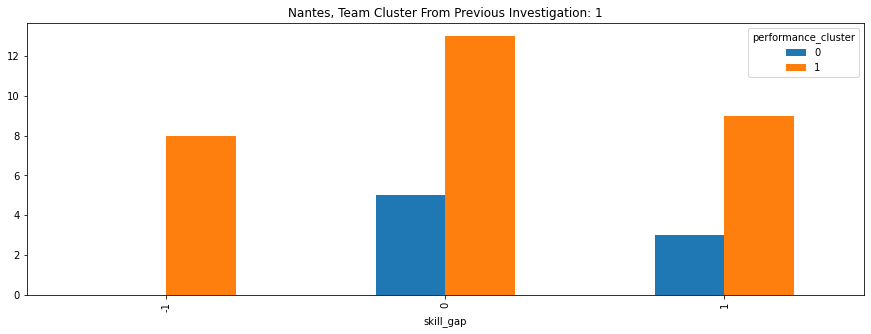

<Figure size 432x288 with 0 Axes>

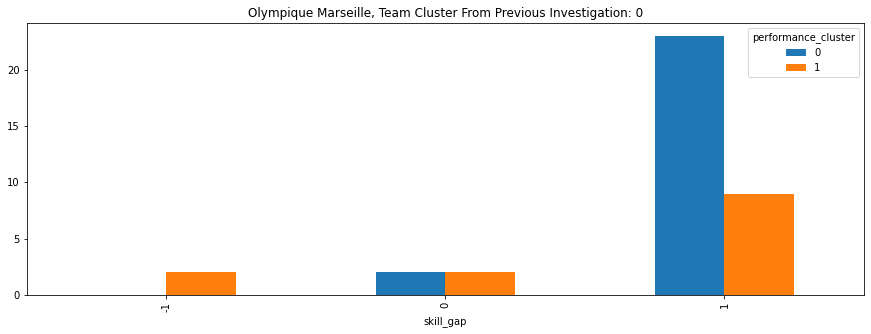

<Figure size 432x288 with 0 Axes>

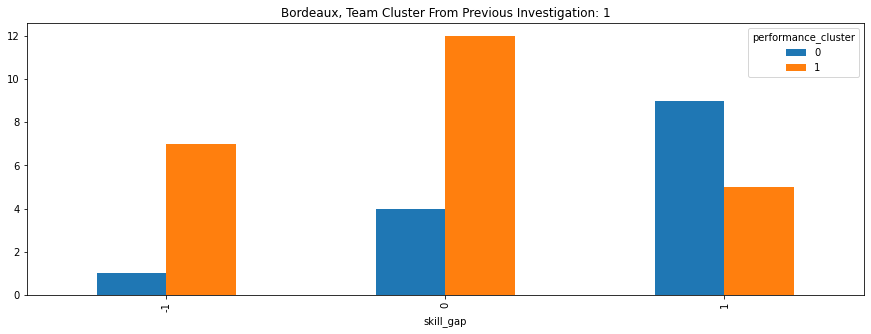

<Figure size 432x288 with 0 Axes>

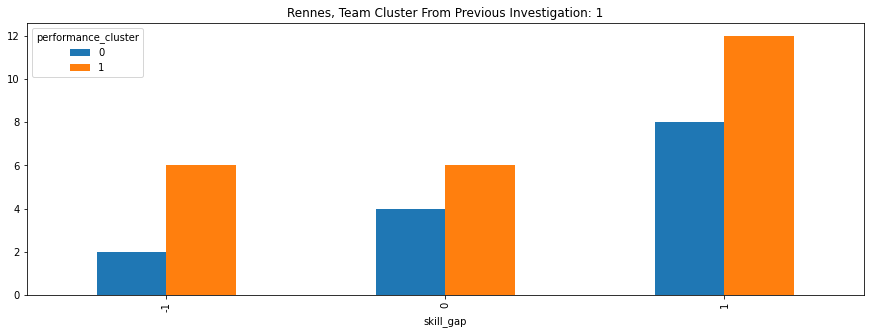

<Figure size 432x288 with 0 Axes>

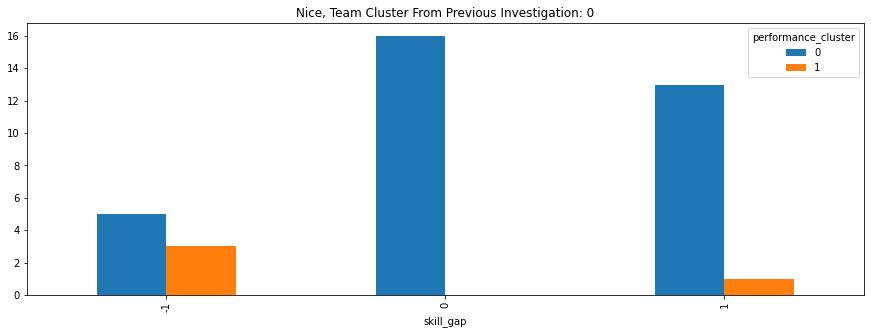

<Figure size 432x288 with 0 Axes>

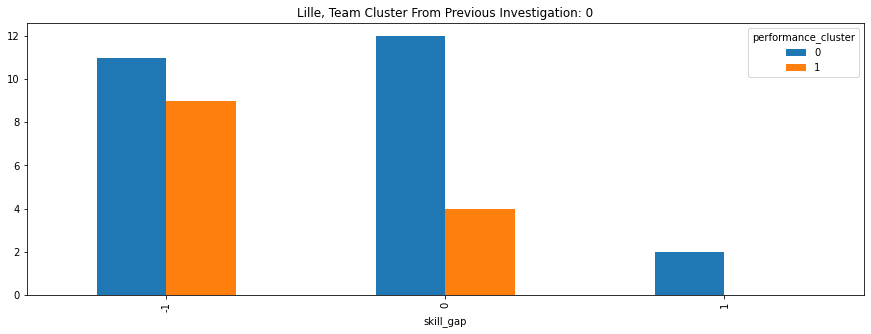

<Figure size 432x288 with 0 Axes>

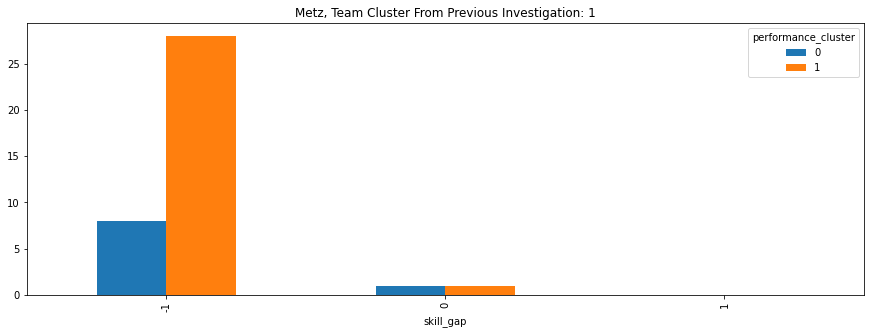

<Figure size 432x288 with 0 Axes>

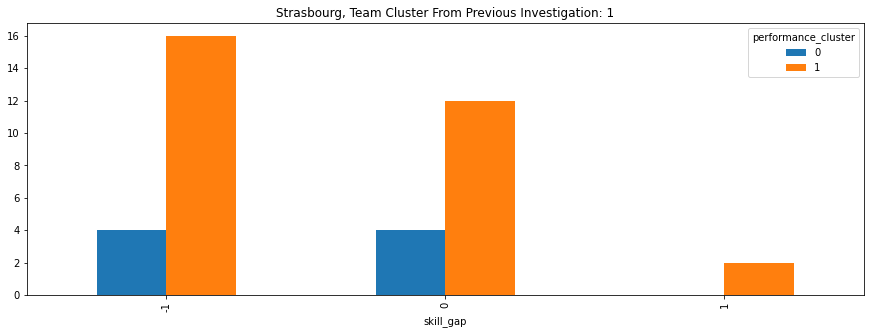

<Figure size 432x288 with 0 Axes>

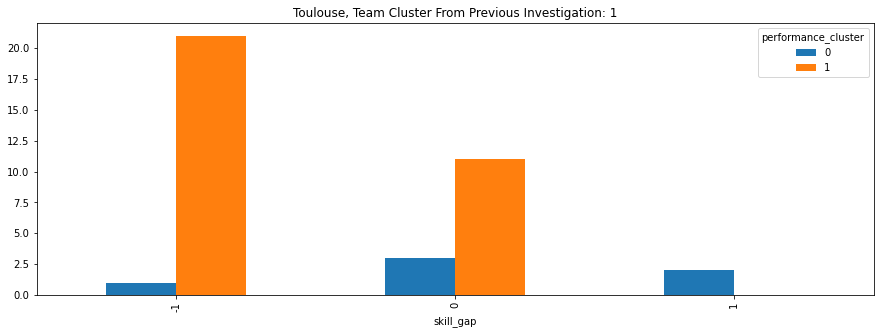

<Figure size 432x288 with 0 Axes>

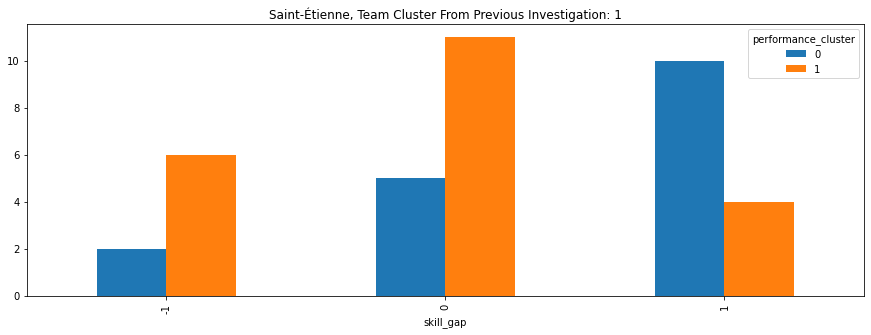

<Figure size 432x288 with 0 Axes>

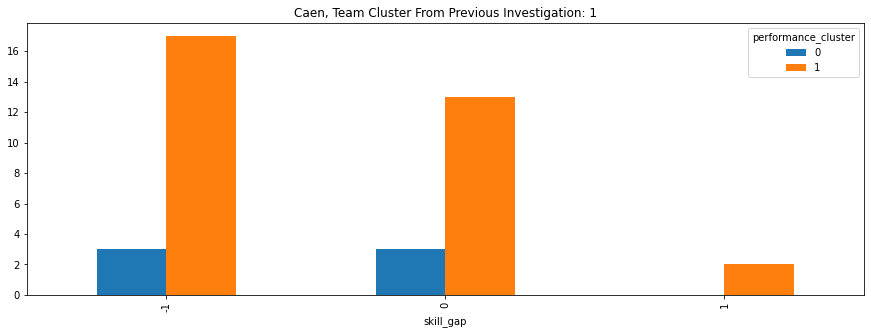

<Figure size 432x288 with 0 Axes>

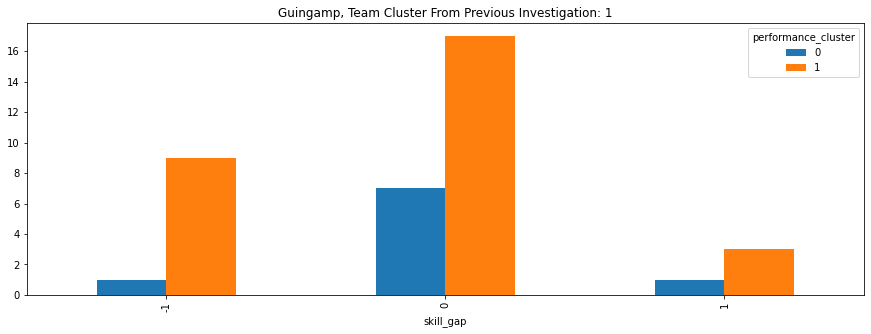

<Figure size 432x288 with 0 Axes>

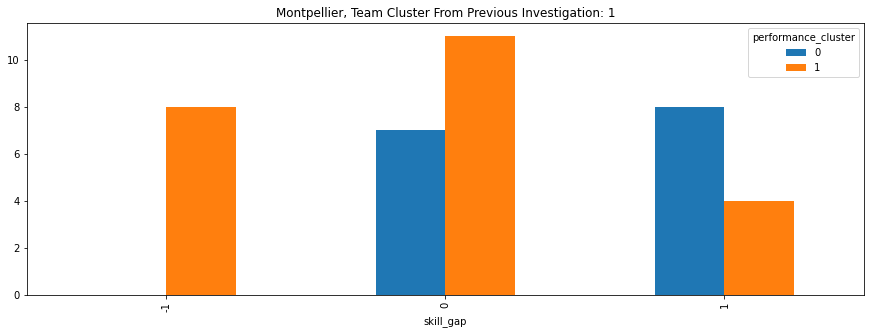

<Figure size 432x288 with 0 Axes>

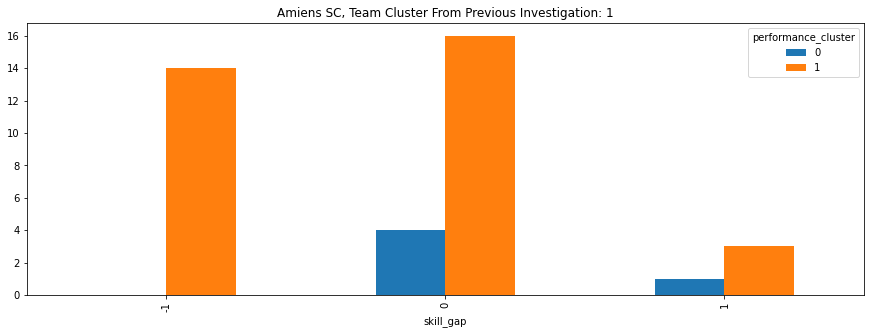

<Figure size 432x288 with 0 Axes>

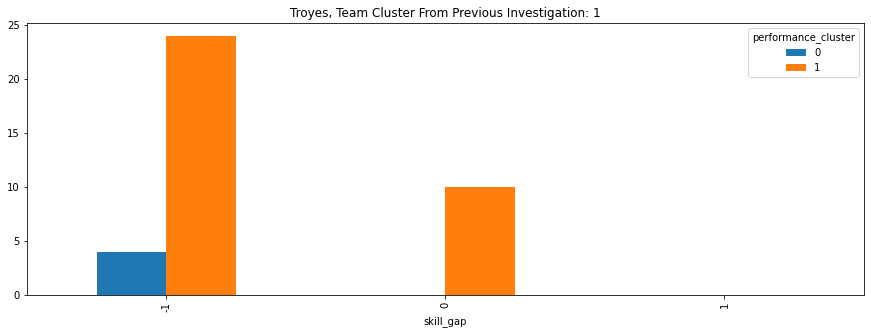

<Figure size 432x288 with 0 Axes>

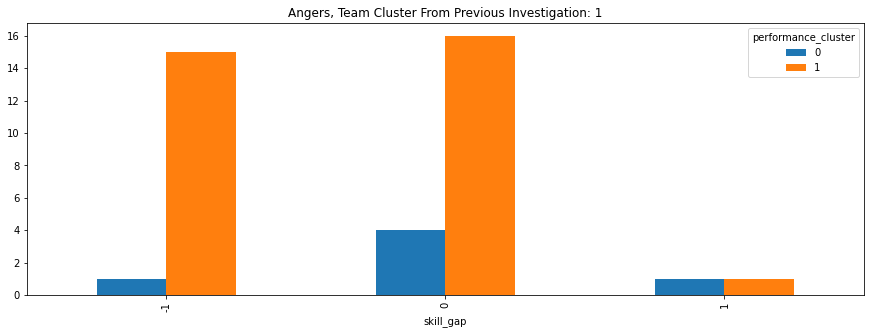

<Figure size 432x288 with 0 Axes>

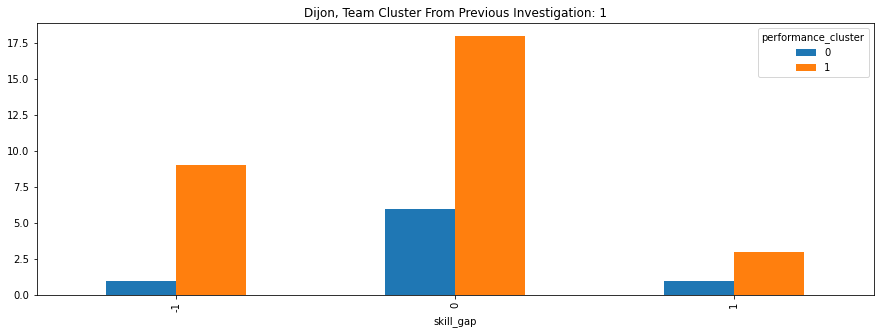

<Figure size 432x288 with 0 Axes>

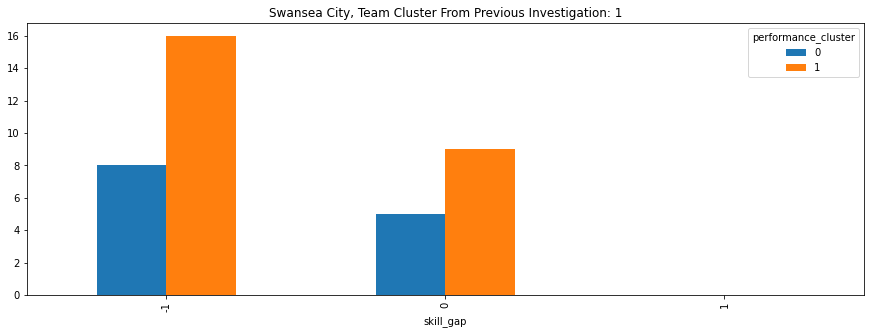

<Figure size 432x288 with 0 Axes>

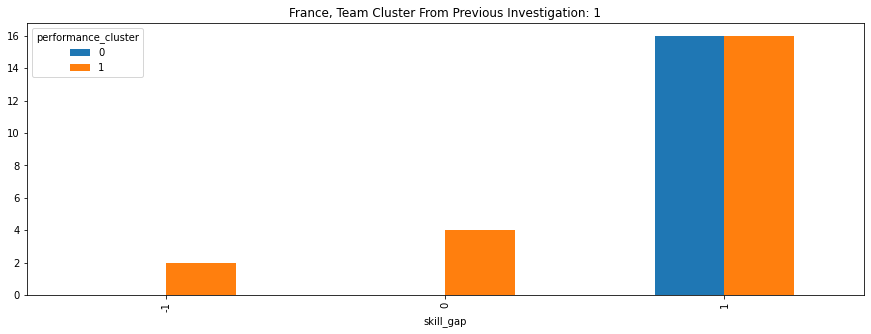

In [18]:
import unidecode

for team in df_combined.index:
    plt.figure()
    name = df_combined.loc[team, 'name']
    name = name.encode().decode('unicode-escape')
    
    cluster = df_combined.loc[team, 'CLUSTER_GLOBAL']
    aggr_stats.loc[team].plot(kind='bar', title='{}, Team Cluster From Previous Investigation: {}'.format(name, cluster), figsize=(15, 5))
    
    plt.savefig('../figures/style_vs_skill_difference/{}.png'.format(name), bbox_inches='tight')
    plt.show()
    plt.close()

In [69]:
df = aggr_stats.unstack().stack(level=1)
df.columns = ['num_times_cluster_{}'.format(c) for c in df.columns]
df.index = pd.MultiIndex.from_tuples([(df_combined.loc[i[0], 'name'].encode().decode('unicode-escape'), i[1]) for i in df.index],
                                    names=['Team', 'Skill-Gap'])
df['dominant_cluster'] = df.idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))
df['percent_dominant_cluster'] = 100 * df[['num_times_cluster_0', 'num_times_cluster_1']].max(axis=1)/df[['num_times_cluster_0', 'num_times_cluster_1']].sum(axis=1)
df['percent_dominant_cluster'] = df['percent_dominant_cluster'].round(2)
df['sample_size (num_games)'] = df[['num_times_cluster_0', 'num_times_cluster_1']].sum(axis=1)
df = df.fillna(0)
df.to_csv('../figures/style_vs_skill_difference/performance_cluster_breakdown.csv')
df.to_pickle('../figures/style_vs_skill_difference/performance_cluster_breakdown.pkl.gz')
df

num_times_cluster_0  num_times_cluster_1  \
Team           Skill-Gap                                             
Arsenal        -1                         5.0                  3.0   
                0                         3.0                  1.0   
                1                        26.0                  0.0   
Leicester City -1                         0.0                 12.0   
                0                         6.0                 12.0   
...                                       ...                  ...   
Udinese         0                         4.0                 10.0   
                1                         2.0                  2.0   
Chievo         -1                         1.0                 19.0   
                0                         6.0                  8.0   
                1                         3.0                  1.0   

                          dominant_cluster  percent_dominant_cluster  \
Team           Skill-Gap                                               
Arsenal        -1                        0                     62.50   
                0                        0                     75.00   
                1                        0                    100.00   
Leicester City -1                        1                    100.00   
                0                        1                     66.67   
...                                    ...                       ...   
Udinese         0                        1                     71.43   
                1                        0                     50.00   
Chievo         -1                        1                     95.00   
                0                        1                     57.14   
                1                        0                     75.00   

                          sample_size (num_games)  
Team           Skill-Gap                           
Arsenal        -1                             8.0  
                0                             4.0  
                1                            26.0  
Leicester City -1                            12.0  
                0                            18.0  
...                                           ...  
Udinese         0                            14.0  
                1                             4.0  
Chievo         -1                            20.0  
                0                            14.0  
                1                             4.0  

[294 rows x 5 columns]

<Figure size 1080x360 with 0 Axes>

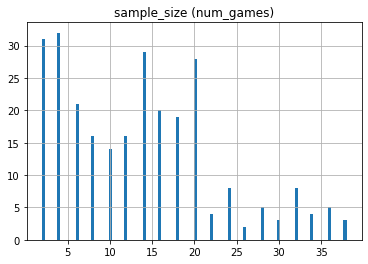

In [71]:
plt.figure(figsize=(15, 5))
df[['sample_size (num_games)']].replace(0, np.nan).hist(bins=100)
plt.show()

In [70]:
df.head(15)

num_times_cluster_0  num_times_cluster_1  \
Team                   Skill-Gap                                             
Arsenal                -1                         5.0                  3.0   
                        0                         3.0                  1.0   
                        1                        26.0                  0.0   
Leicester City         -1                         0.0                 12.0   
                        0                         6.0                 12.0   
                        1                         6.0                  2.0   
Manchester City        -1                         0.0                  0.0   
                        0                         0.0                  0.0   
                        1                        37.0                  1.0   
Brighton & Hove Albion -1                         0.0                 14.0   
                        0                         7.0                 17.0   
                        1                         0.0                  0.0   
Chelsea                -1                         1.0                  3.0   
                        0                         3.0                  3.0   
                        1                        28.0                  0.0   

                                  dominant_cluster  percent_dominant_cluster  \
Team                   Skill-Gap                                               
Arsenal                -1                        0                     62.50   
                        0                        0                     75.00   
                        1                        0                    100.00   
Leicester City         -1                        1                    100.00   
                        0                        1                     66.67   
                        1                        0                     75.00   
Manchester City        -1                        0                      0.00   
                        0                        0                      0.00   
                        1                        0                     97.37   
Brighton & Hove Albion -1                        1                    100.00   
                        0                        1                     70.83   
                        1                        0                      0.00   
Chelsea                -1                        1                     75.00   
                        0                        0                     50.00   
                        1                        0                    100.00   

                                  sample_size (num_games)  
Team                   Skill-Gap                           
Arsenal                -1                             8.0  
                        0                             4.0  
                        1                            26.0  
Leicester City         -1                            12.0  
                        0                            18.0  
                        1                             8.0  
Manchester City        -1                             0.0  
                        0                             0.0  
                        1                            38.0  
Brighton & Hove Albion -1                            14.0  
                        0                            24.0  
                        1                             0.0  
Chelsea                -1                             4.0  
                        0                             6.0  
                        1                            28.0